<a href="https://colab.research.google.com/github/hmustafa9/SUPPORT2_Classification/blob/main/ML2_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Feb  6 20:13:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Data and Package Loading

In [ ]:

# Packages / libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss


# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})

# view all the dataframe
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [ ]:
data=pd.read_csv('c4.csv')

In [ ]:
data.head()

id  adlp  adls     adlsc       age       alb   aps    avtisst      bili  \
0   1   NaN   5.0  5.000000  43.25000  3.199707  66.0  53.333313  1.599854   
1   2   1.0   0.0  0.000000  61.26999       NaN  26.0  18.000000       NaN   
2   3   3.0   0.0  0.000000  59.49298  2.199707  13.0  14.000000  5.199219   
3   4   NaN   NaN  2.162598  64.07397       NaN  60.0  40.500000  0.500000   
4   5   NaN   2.0  2.000000  68.28198  2.799805  51.0  35.000000  1.699951   

    bun          ca   charges      crea  death  dementia  diabetes  \
0  81.0          no  133810.0  2.899902      1         0         0   
1   NaN  metastatic    3754.0  0.799927      1         0         0   
2  92.0          no    5043.0  8.398438      0         0         0   
3  41.0          no  280170.0  5.199219      1         0         0   
4  49.0          no   22189.0  1.500000      1         0         1   

              dnr  dnrday             dzclass            dzgroup   edu  \
0  dnr after sadm    12.0            ARF/MOSF  ARF/MOSF w/Sepsis   8.0   
1          no dnr     6.0              Cancer        Lung Cancer  10.0   
2          no dnr     5.0  COPD/CHF/Cirrhosis               COPD   7.0   
3  dnr after sadm     7.0            ARF/MOSF  ARF/MOSF w/Sepsis  12.0   
4          no dnr    10.0            ARF/MOSF  ARF/MOSF w/Sepsis  12.0   

     feat01    feat02    feat03    feat04    feat05    feat06    feat07  \
0  1.540657  0.557894  0.667354  0.384055  0.251228  1.273564  0.806135   
1  0.848557  0.571535  0.625900  0.460354  0.562102  0.743605  1.042614   
2  1.641549  0.513618  0.408856  0.508101  0.778078  0.513540  0.972226   
3  1.098966  0.682665  0.617119  0.470901  0.288910  0.901206  1.262879   
4  0.652783  0.669777  0.628146  0.656311  0.309162  0.602043  0.316869   

     feat08    feat09    feat10  glucose  hday  hospdead    hrt      income  \
0  1.069761  1.127174  1.072736    212.0     2         1  115.0  under $11k   
1  1.156646  1.247418  0.762396      NaN     1         0  100.0    $25-$50k   
2  0.863682  0.761310  0.832775    112.0     1         0   40.0  under $11k   
3  0.567810  1.295646  1.077985    272.0    53         1  115.0         NaN   
4  1.117573  0.979663  0.837734    199.0     1         0  140.0    $11-$25k   

   meanbp  num.co       pafi        ph  prg2m  prg6m      race  resp  scoma  \
0   133.0       0  259.25000  7.479492   0.50   0.50     white  33.0    0.0   
1    73.0       2        NaN       NaN   0.90   0.80     white  28.0    0.0   
2    30.0       4  126.65625  7.319336   0.70   1.00  hispanic  12.0    0.0   
3    50.0       1  438.06250  7.429688   0.10   0.10     white  27.0    0.0   
4   114.0       4  240.00000  7.119141   0.35   0.25     white  28.0   41.0   

      sex                sfdm2    sod        sps    surv2m    surv6m  \
0    male     <2 mo. follow-up  145.0  28.699219  0.800903  0.734985   
1    male  no(M2 and SIP pres)  134.0  21.898438  0.607910  0.291992   
2    male  no(M2 and SIP pres)  132.0  18.699219  0.897949  0.827881   
3  female     <2 mo. follow-up  147.0  33.500000  0.511963  0.394958   
4  female  no(M2 and SIP pres)  144.0  32.796875  0.431946  0.311951   

       temp       totcst       totmcst   urine       wblc  
0  39.39844   72628.0625   63859.00000  2215.0   8.500000  
1  35.39844    2838.4238     800.45996     NaN   5.799805  
2  37.89844    2951.9746    3561.47852     0.0  43.398438  
3  35.79688  158999.8750  159265.00000   705.0  24.898438  
4  37.59375   14281.4219   16558.23440     NaN  19.597656

In [ ]:
#checking for null Values
data.isnull().sum().sort_values(ascending=False)/len(data)

adlp        0.617417
urine       0.534884
glucose     0.494904
bun         0.478575
totmcst     0.382385
alb         0.371796
income      0.327660
adls        0.314993
bili        0.284810
pafi        0.256210
ph          0.252053
prg2m       0.184463
prg6m       0.182682
edu         0.180208
sfdm2       0.152301
totcst      0.098367
wblc        0.023157
charges     0.019594
avtisst     0.009005
crea        0.007224
race        0.004849
dnrday      0.003365
dnr         0.003365
scoma       0.000099
resp        0.000099
sod         0.000099
sps         0.000099
surv2m      0.000099
surv6m      0.000099
temp        0.000099
aps         0.000099
meanbp      0.000099
hrt         0.000099
sex         0.000000
num.co      0.000000
id          0.000000
hospdead    0.000000
hday        0.000000
adlsc       0.000000
age         0.000000
ca          0.000000
death       0.000000
dementia    0.000000
diabetes    0.000000
dzclass     0.000000
dzgroup     0.000000
feat01      0.000000
feat02      0

In [ ]:
data.dtypes

id            int64
adlp        float64
adls        float64
adlsc       float64
age         float64
alb         float64
aps         float64
avtisst     float64
bili        float64
bun         float64
ca           object
charges     float64
crea        float64
death         int64
dementia      int64
diabetes      int64
dnr          object
dnrday      float64
dzclass      object
dzgroup      object
edu         float64
feat01      float64
feat02      float64
feat03      float64
feat04      float64
feat05      float64
feat06      float64
feat07      float64
feat08      float64
feat09      float64
feat10      float64
glucose     float64
hday          int64
hospdead      int64
hrt         float64
income       object
meanbp      float64
num.co        int64
pafi        float64
ph          float64
prg2m       float64
prg6m       float64
race         object
resp        float64
scoma       float64
sex          object
sfdm2        object
sod         float64
sps         float64
surv2m      float64


In [ ]:
strings = ['ca','dnr','dzclass','dzgroup','race','income','sex','sfdm2','hospdead','edu','prg6m','adlp']
numeric = set(data.columns).difference(set(strings))

for s in strings:
    data[s] = data[s].astype(str)

for n in numeric:
    #raw_data[n][raw_data[n] == 'Unknown'] = 0
    data[n] = data[n].astype(float)

In [ ]:
data.head()

id adlp  adls     adlsc       age       alb   aps    avtisst      bili  \
0  1.0  nan   5.0  5.000000  43.25000  3.199707  66.0  53.333313  1.599854   
1  2.0  1.0   0.0  0.000000  61.26999       NaN  26.0  18.000000       NaN   
2  3.0  3.0   0.0  0.000000  59.49298  2.199707  13.0  14.000000  5.199219   
3  4.0  nan   NaN  2.162598  64.07397       NaN  60.0  40.500000  0.500000   
4  5.0  nan   2.0  2.000000  68.28198  2.799805  51.0  35.000000  1.699951   

    bun          ca   charges      crea  death  dementia  diabetes  \
0  81.0          no  133810.0  2.899902    1.0       0.0       0.0   
1   NaN  metastatic    3754.0  0.799927    1.0       0.0       0.0   
2  92.0          no    5043.0  8.398438    0.0       0.0       0.0   
3  41.0          no  280170.0  5.199219    1.0       0.0       0.0   
4  49.0          no   22189.0  1.500000    1.0       0.0       1.0   

              dnr  dnrday             dzclass            dzgroup   edu  \
0  dnr after sadm    12.0            ARF/MOSF  ARF/MOSF w/Sepsis   8.0   
1          no dnr     6.0              Cancer        Lung Cancer  10.0   
2          no dnr     5.0  COPD/CHF/Cirrhosis               COPD   7.0   
3  dnr after sadm     7.0            ARF/MOSF  ARF/MOSF w/Sepsis  12.0   
4          no dnr    10.0            ARF/MOSF  ARF/MOSF w/Sepsis  12.0   

     feat01    feat02    feat03    feat04    feat05    feat06    feat07  \
0  1.540657  0.557894  0.667354  0.384055  0.251228  1.273564  0.806135   
1  0.848557  0.571535  0.625900  0.460354  0.562102  0.743605  1.042614   
2  1.641549  0.513618  0.408856  0.508101  0.778078  0.513540  0.972226   
3  1.098966  0.682665  0.617119  0.470901  0.288910  0.901206  1.262879   
4  0.652783  0.669777  0.628146  0.656311  0.309162  0.602043  0.316869   

     feat08    feat09    feat10  glucose  hday hospdead    hrt      income  \
0  1.069761  1.127174  1.072736    212.0   2.0        1  115.0  under $11k   
1  1.156646  1.247418  0.762396      NaN   1.0        0  100.0    $25-$50k   
2  0.863682  0.761310  0.832775    112.0   1.0        0   40.0  under $11k   
3  0.567810  1.295646  1.077985    272.0  53.0        1  115.0         nan   
4  1.117573  0.979663  0.837734    199.0   1.0        0  140.0    $11-$25k   

   meanbp  num.co       pafi        ph  prg2m prg6m      race  resp  scoma  \
0   133.0     0.0  259.25000  7.479492   0.50   0.5     white  33.0    0.0   
1    73.0     2.0        NaN       NaN   0.90   0.8     white  28.0    0.0   
2    30.0     4.0  126.65625  7.319336   0.70   1.0  hispanic  12.0    0.0   
3    50.0     1.0  438.06250  7.429688   0.10   0.1     white  27.0    0.0   
4   114.0     4.0  240.00000  7.119141   0.35  0.25     white  28.0   41.0   

      sex                sfdm2    sod        sps    surv2m    surv6m  \
0    male     <2 mo. follow-up  145.0  28.699219  0.800903  0.734985   
1    male  no(M2 and SIP pres)  134.0  21.898438  0.607910  0.291992   
2    male  no(M2 and SIP pres)  132.0  18.699219  0.897949  0.827881   
3  female     <2 mo. follow-up  147.0  33.500000  0.511963  0.394958   
4  female  no(M2 and SIP pres)  144.0  32.796875  0.431946  0.311951   

       temp       totcst       totmcst   urine       wblc  
0  39.39844   72628.0625   63859.00000  2215.0   8.500000  
1  35.39844    2838.4238     800.45996     NaN   5.799805  
2  37.89844    2951.9746    3561.47852     0.0  43.398438  
3  35.79688  158999.8750  159265.00000   705.0  24.898438  
4  37.59375   14281.4219   16558.23440     NaN  19.597656

In [ ]:
for column in data:
    try:
        unique_vals = np.unique(data[column])
    except:
        unique_vals = data[column].unique()

    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature id :10105
The number of values for feature adlp :9 -- ['0.0' '1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' 'nan']
The number of values for feature adls :9 -- [0.000000 1.000000 2.000000 3.000000 4.000000 5.000000 6.000000 7.000000
 nan]
The number of values for feature adlsc :1735
The number of values for feature age :7323
The number of values for feature alb :61
The number of values for feature aps :126
The number of values for feature avtisst :353
The number of values for feature bili :296
The number of values for feature bun :160
The number of values for feature ca :3 -- ['metastatic' 'no' 'yes']
The number of values for feature charges :8502
The number of values for feature crea :131
The number of values for feature death :2 -- [0.000000 1.000000]
The number of values for feature dementia :2 -- [0.000000 1.000000]
The number of values for feature diabetes :2 -- [0.000000 1.000000]
The number of values for feature dnr :4 -- ['dnr after sadm' 'dnr before 

In [ ]:
#g = sns.pairplot(data[list(set(data.columns).difference(set(['id'])))])#, height = 5, kind="reg")

# Missing Data

In [ ]:
# changing missing values to mode and median

strings2 = ['ca','dnr','dzclass','dzgroup','race','income','sex','sfdm2','hospdead','edu','prg6m','adlp']
numeric2 = set(data.columns).difference(set(strings))

for s in strings2:
    mode = data[s].mode()[0]
    data[s]= data[s].fillna(mode)
    data[s][data[s] == 'nan'] = mode

for n in numeric2:
    median = data[n].median()
    data[n]= data[n].fillna(median)

In [ ]:
data.isna().sum()

id          0
adlp        0
adls        0
adlsc       0
age         0
alb         0
aps         0
avtisst     0
bili        0
bun         0
ca          0
charges     0
crea        0
death       0
dementia    0
diabetes    0
dnr         0
dnrday      0
dzclass     0
dzgroup     0
edu         0
feat01      0
feat02      0
feat03      0
feat04      0
feat05      0
feat06      0
feat07      0
feat08      0
feat09      0
feat10      0
glucose     0
hday        0
hospdead    0
hrt         0
income      0
meanbp      0
num.co      0
pafi        0
ph          0
prg2m       0
prg6m       0
race        0
resp        0
scoma       0
sex         0
sfdm2       0
sod         0
sps         0
surv2m      0
surv6m      0
temp        0
totcst      0
totmcst     0
urine       0
wblc        0
dtype: int64

# Understanding Data Distribution

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


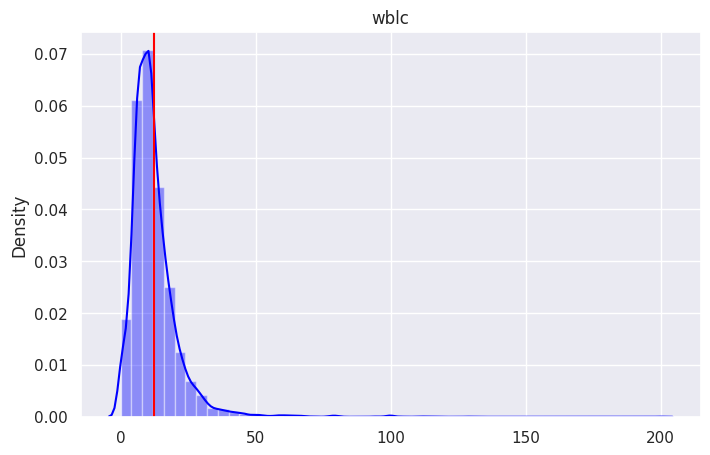

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


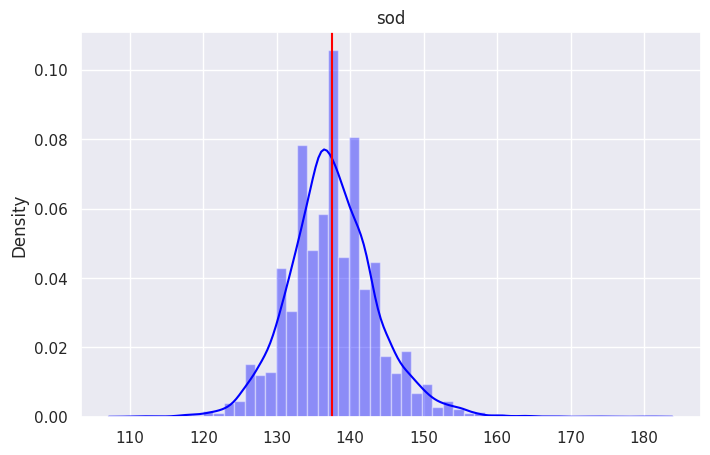

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


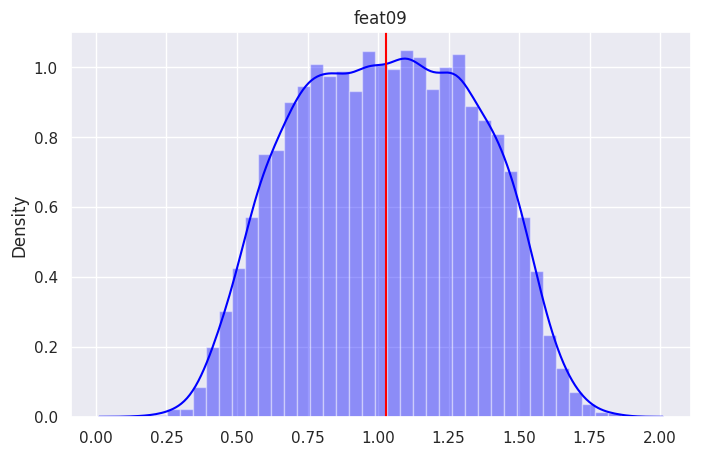

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


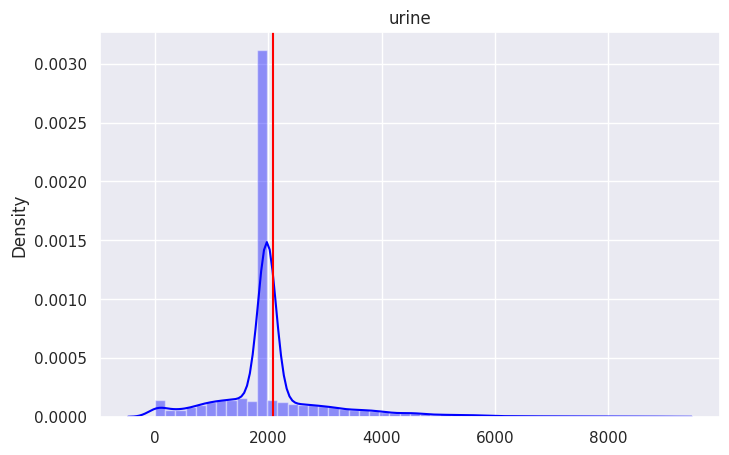

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


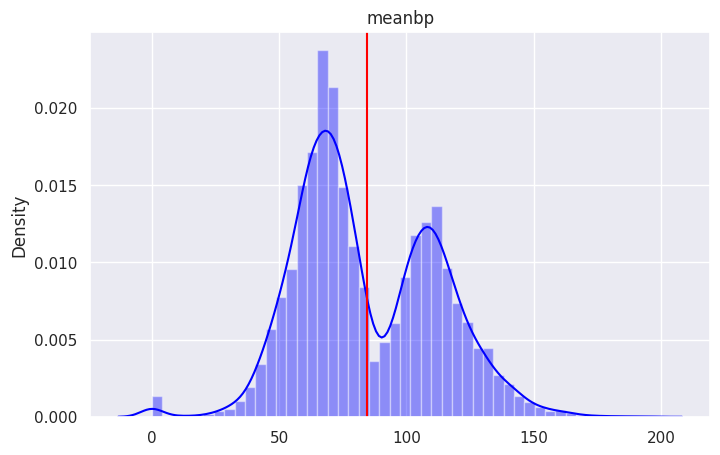

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


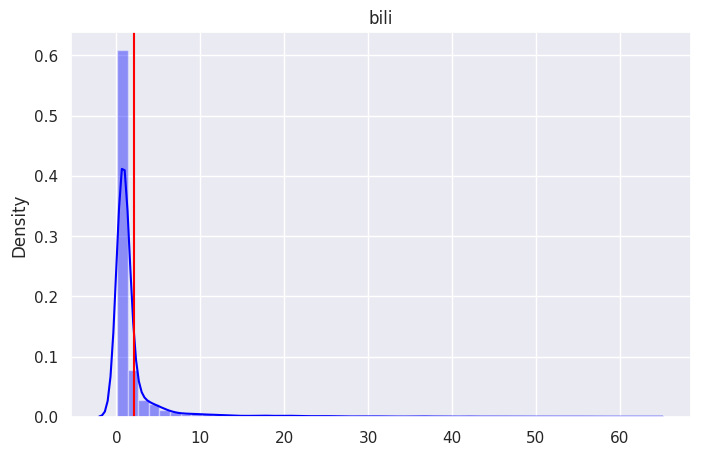

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


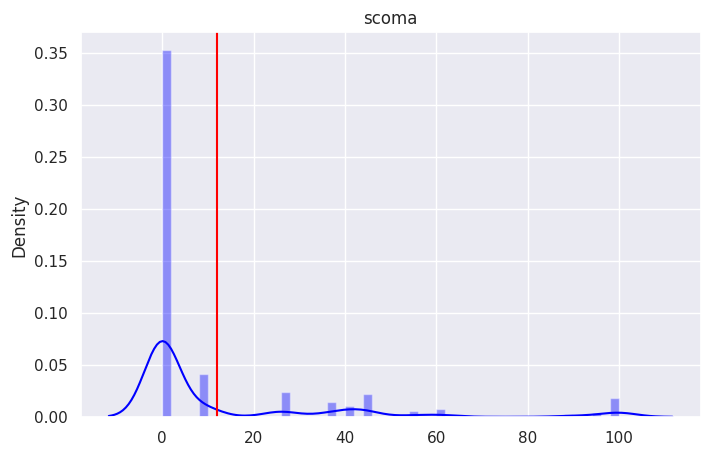

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


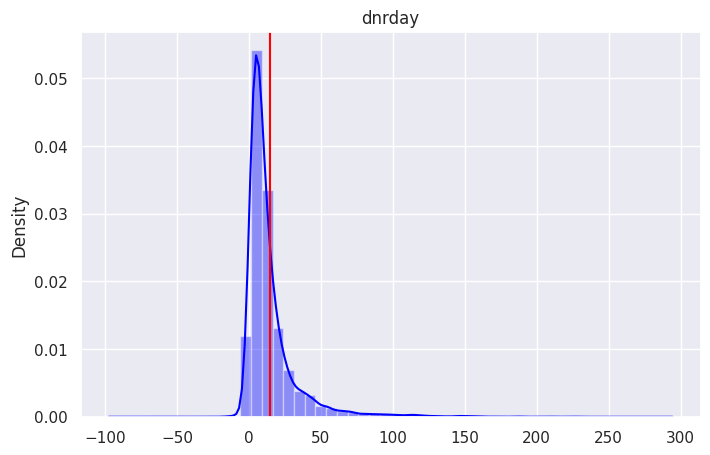

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


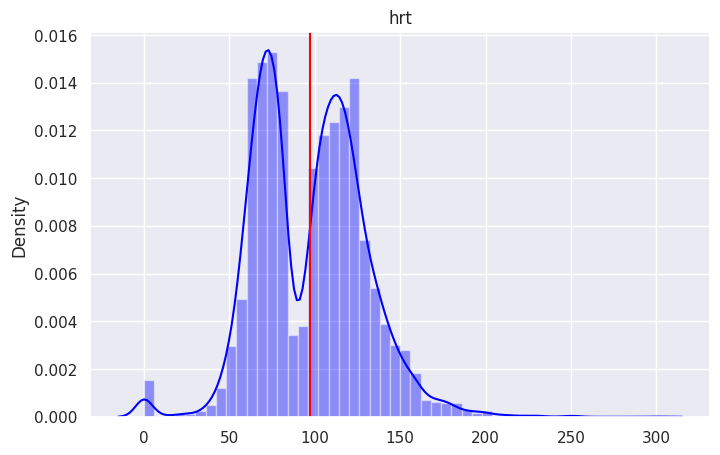

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


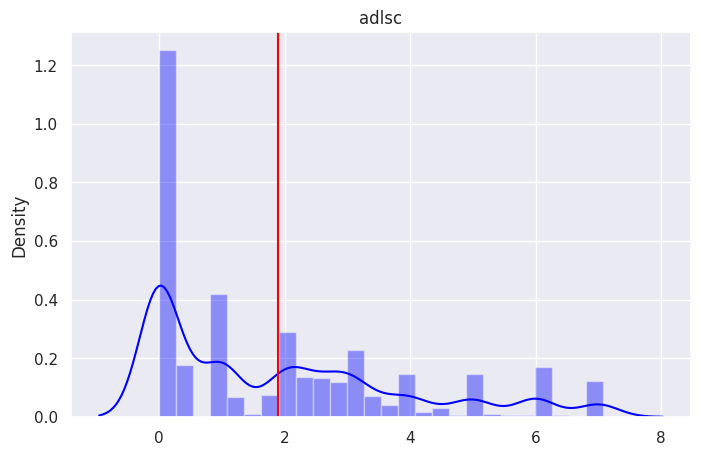

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


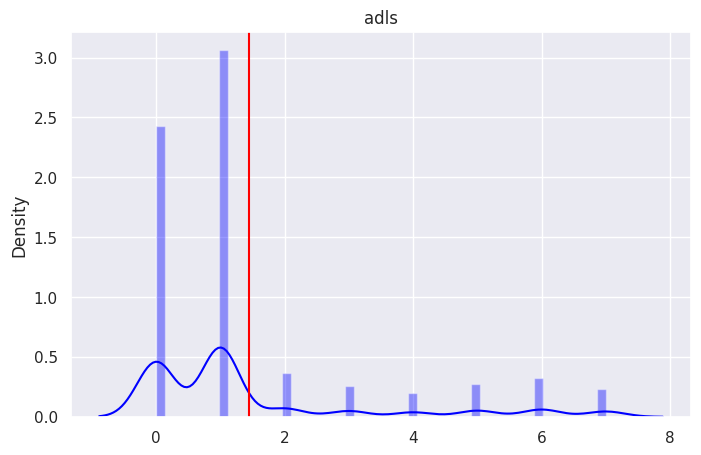

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


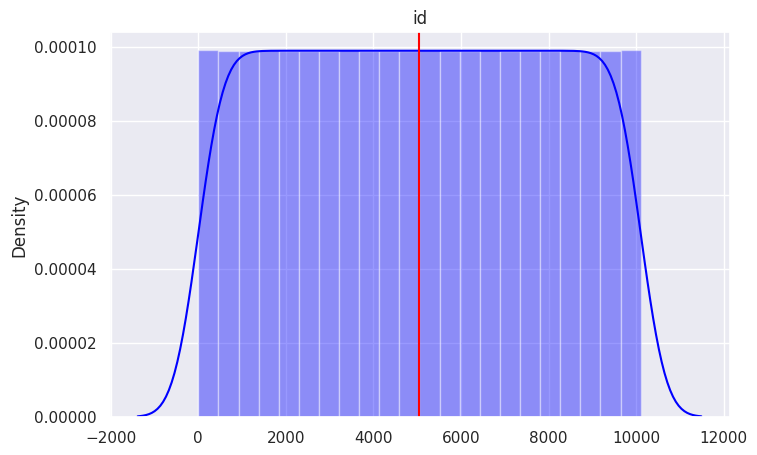

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


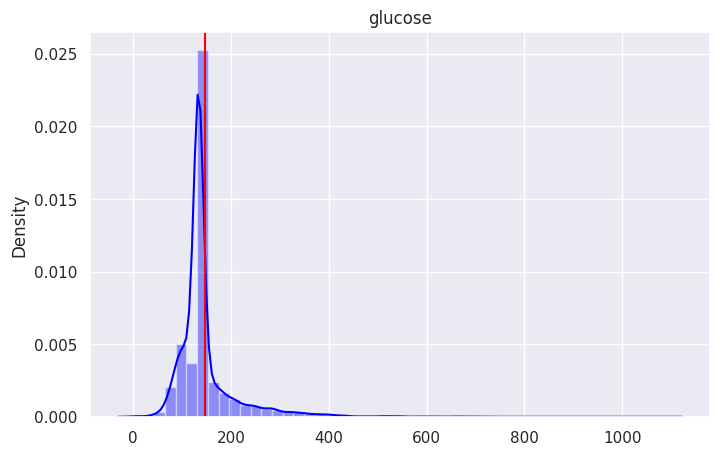

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


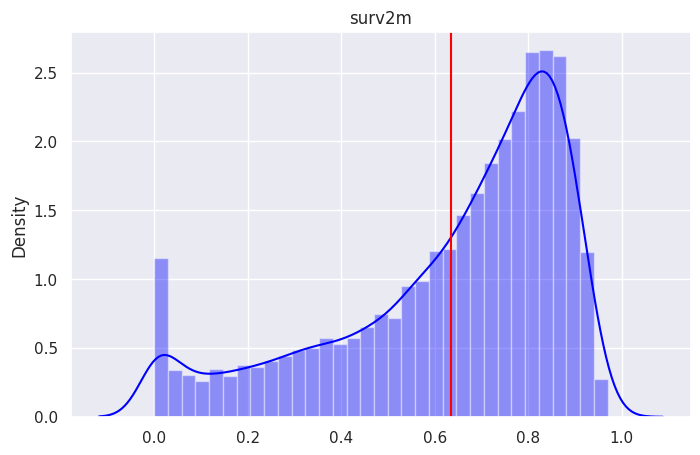

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


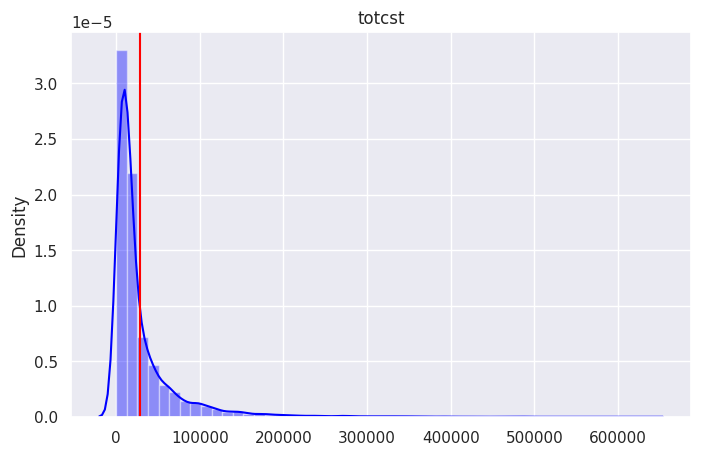

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


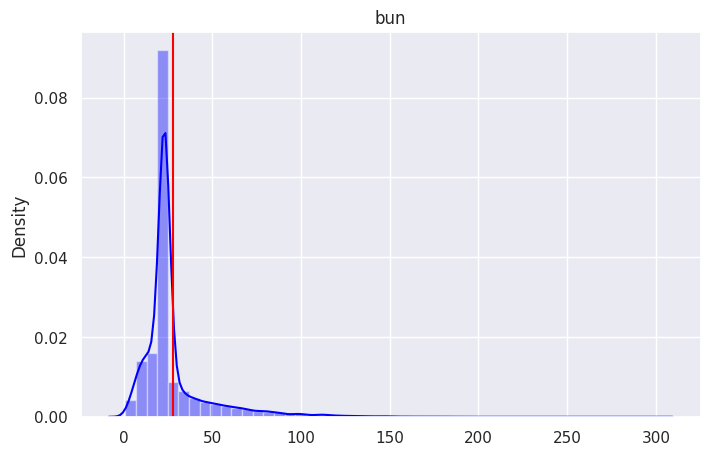

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


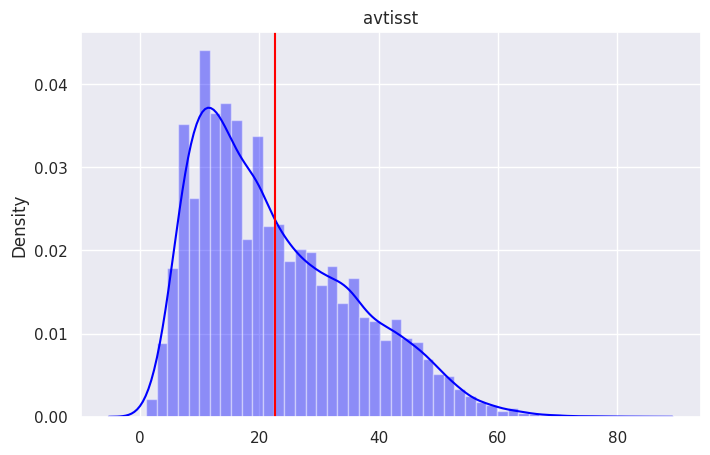

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


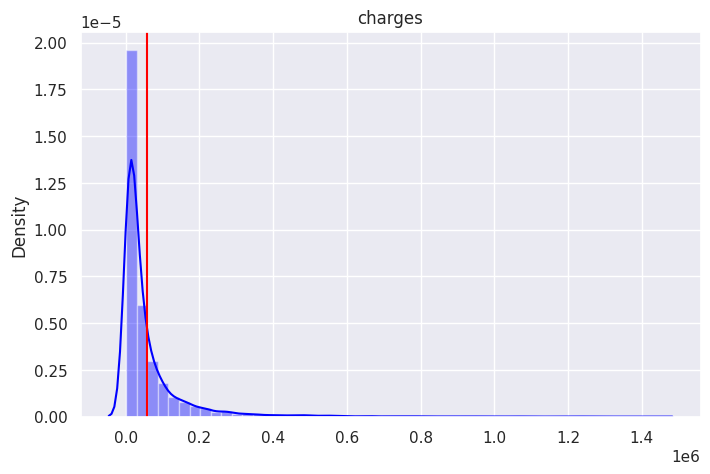

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


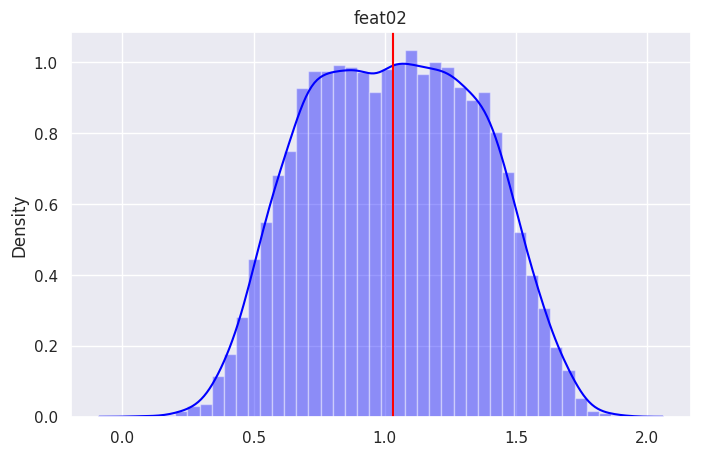

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


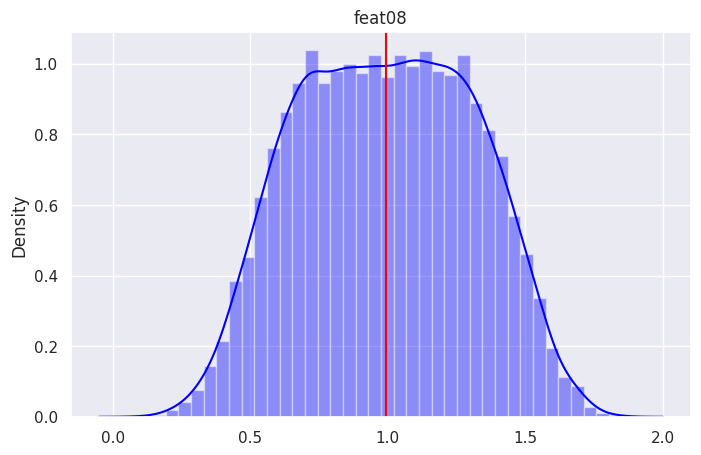

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


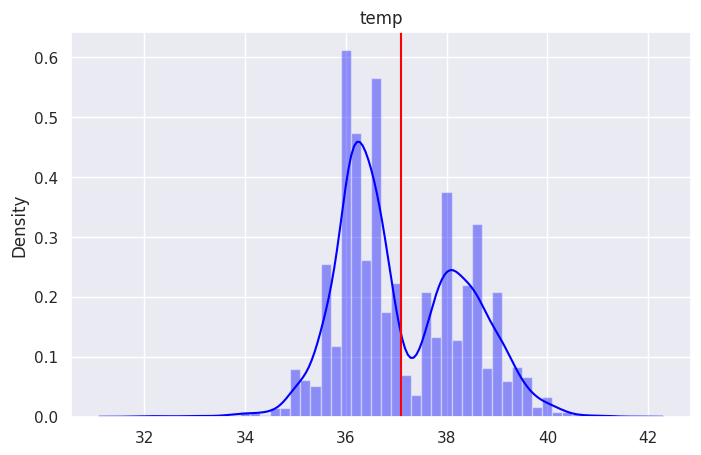

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


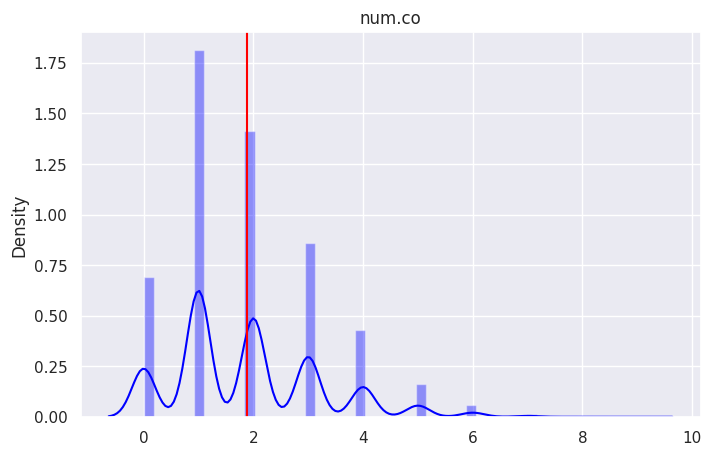

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


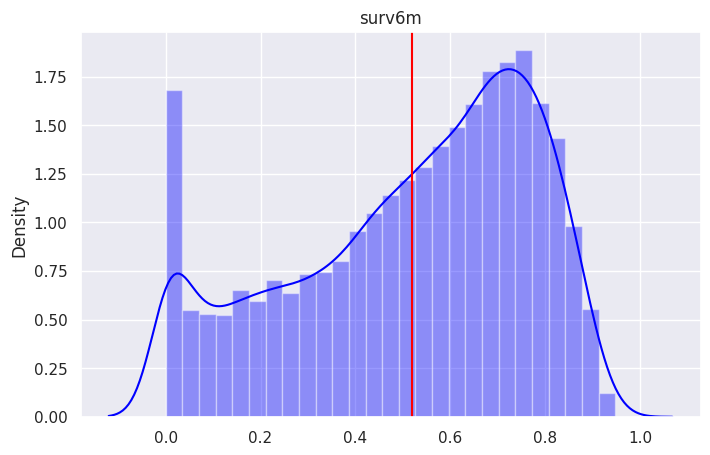

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


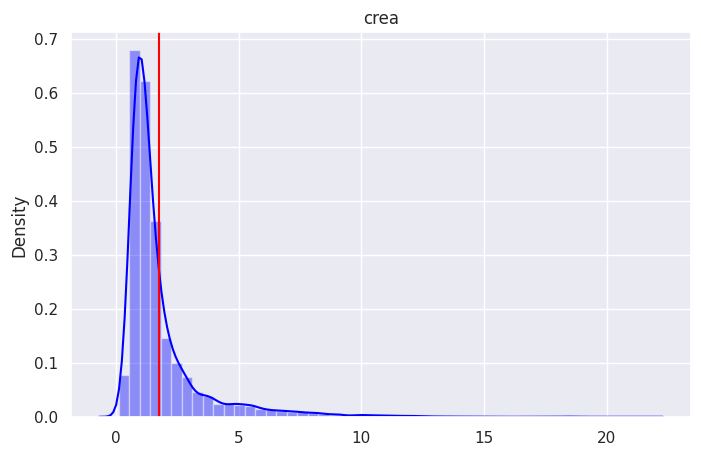

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


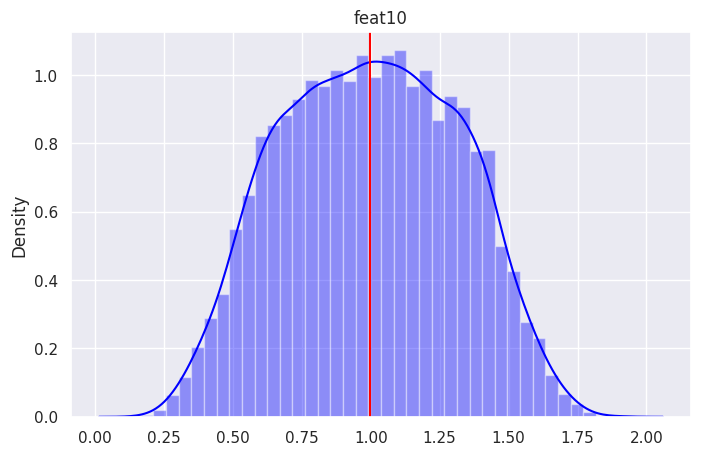

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


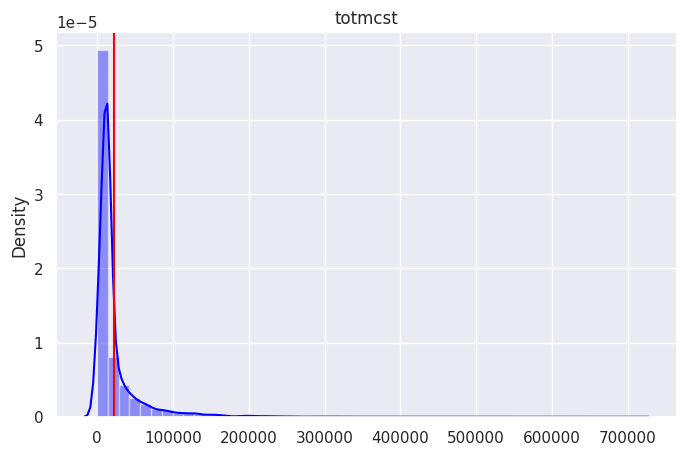

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


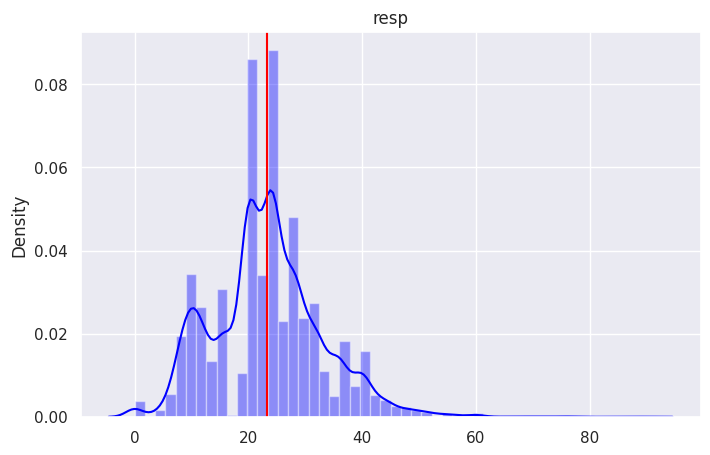

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


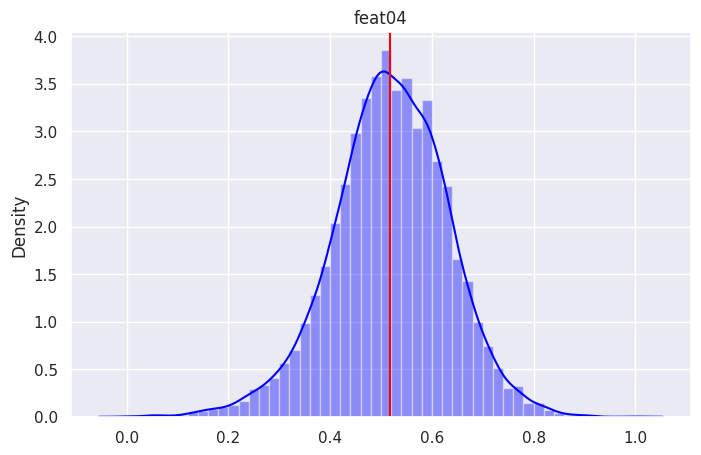

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


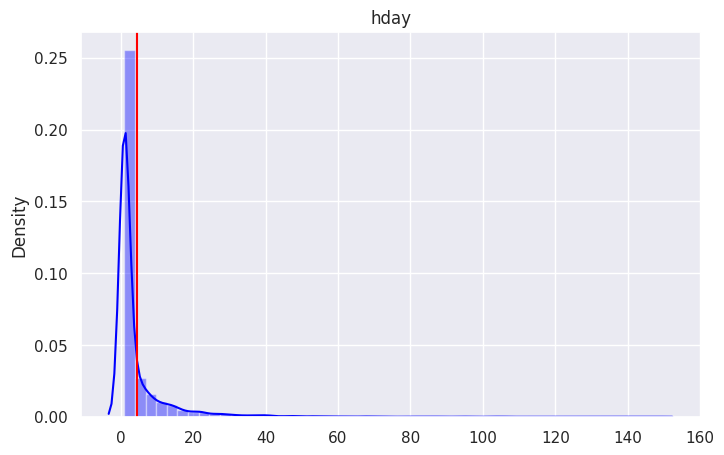

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


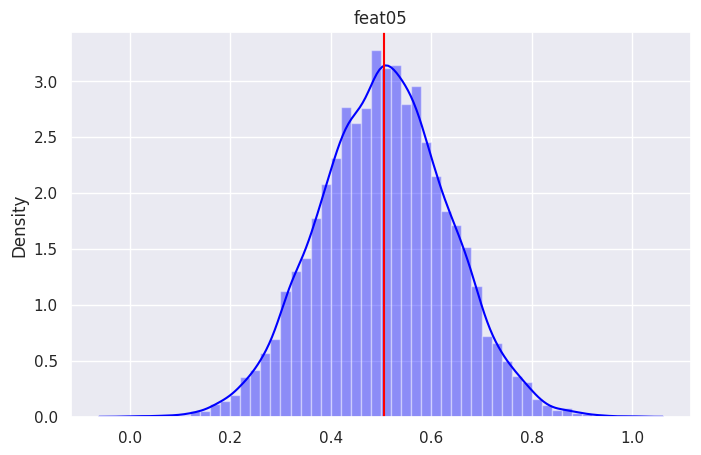

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


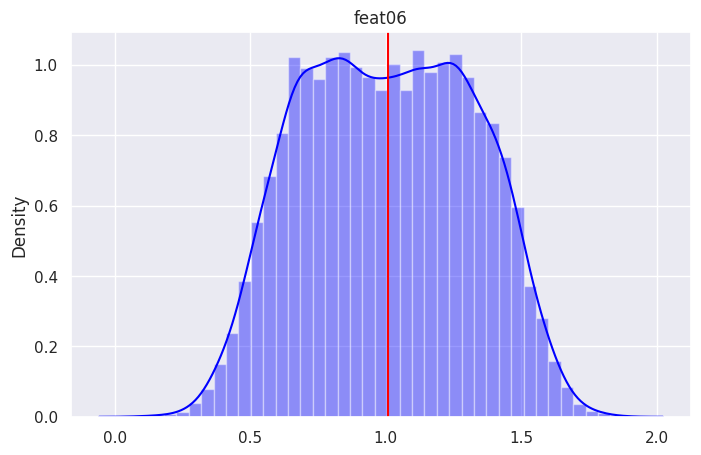

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


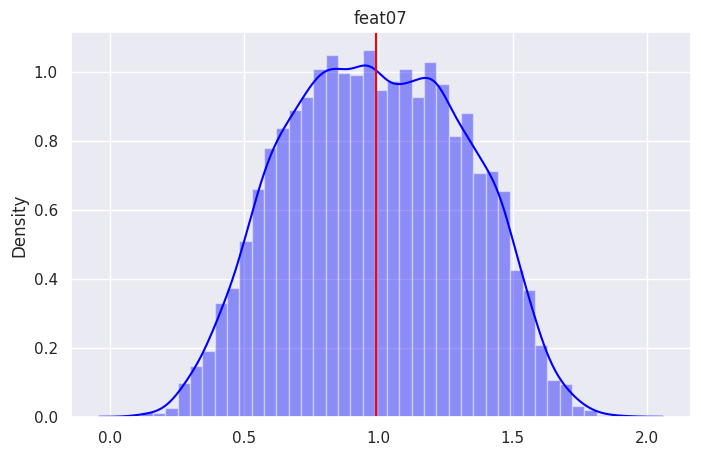

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


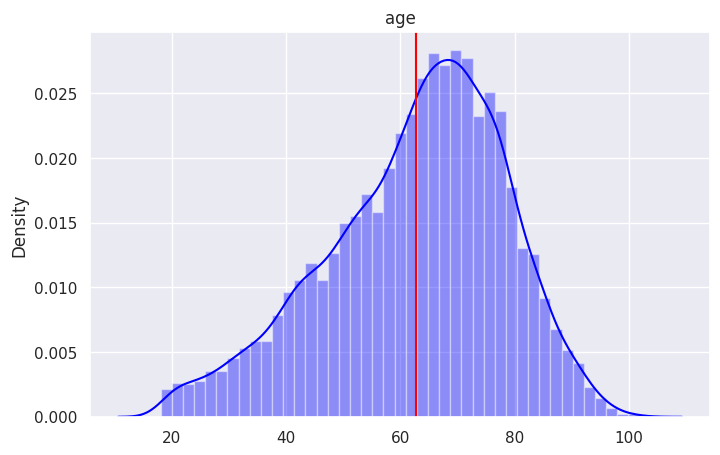

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


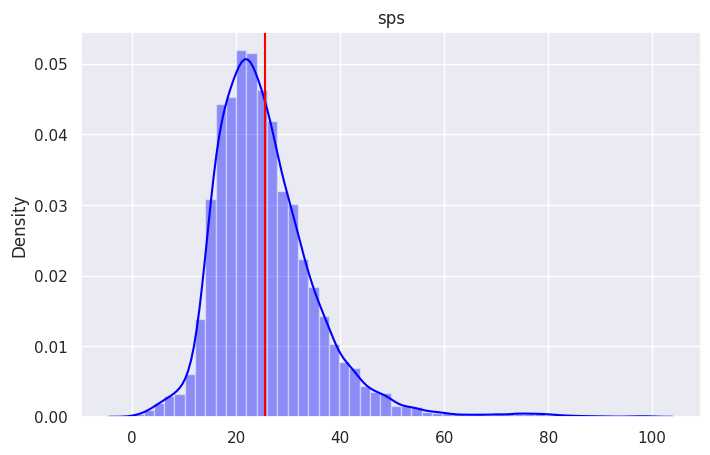

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


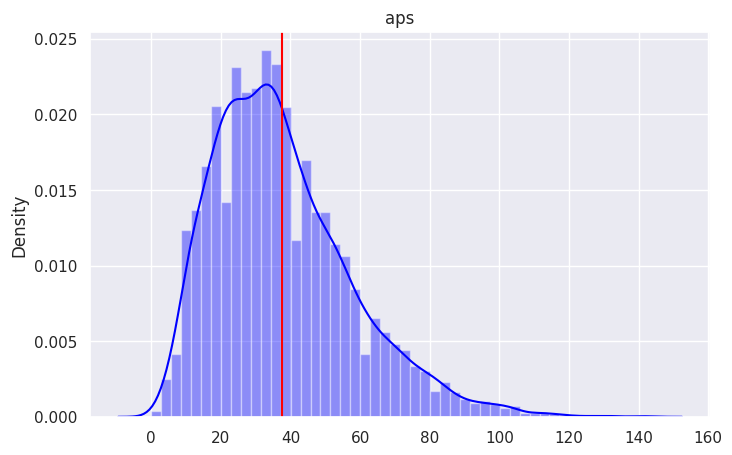

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


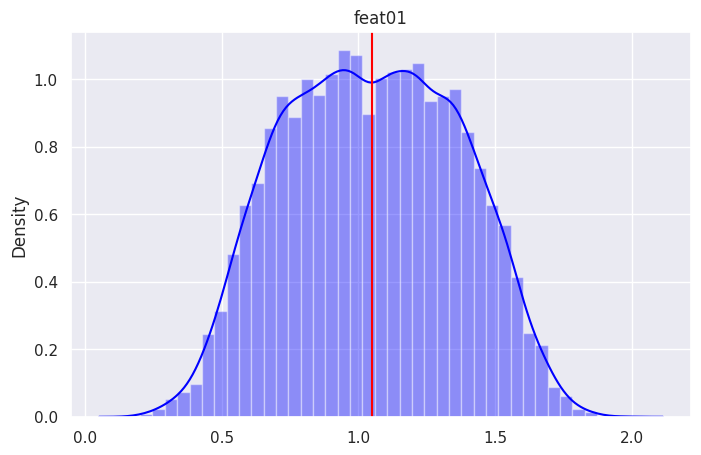

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


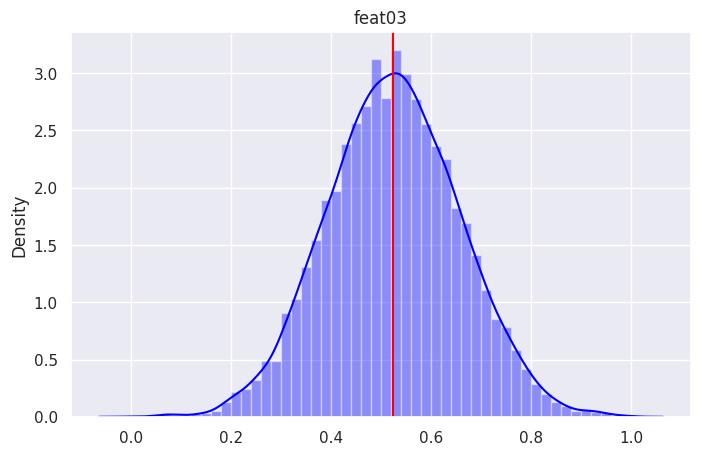

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


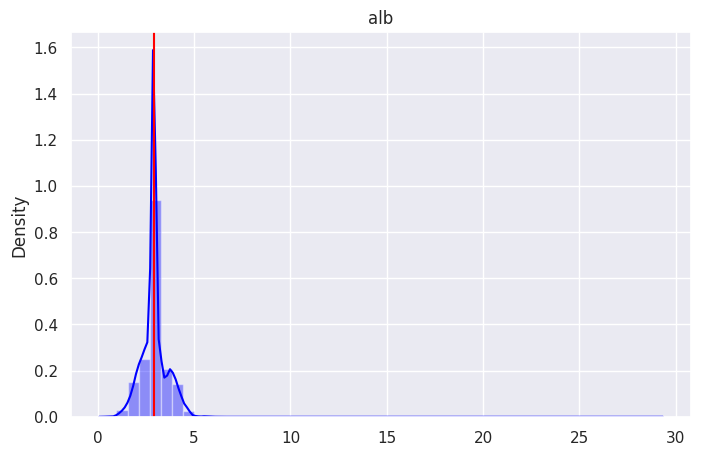

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


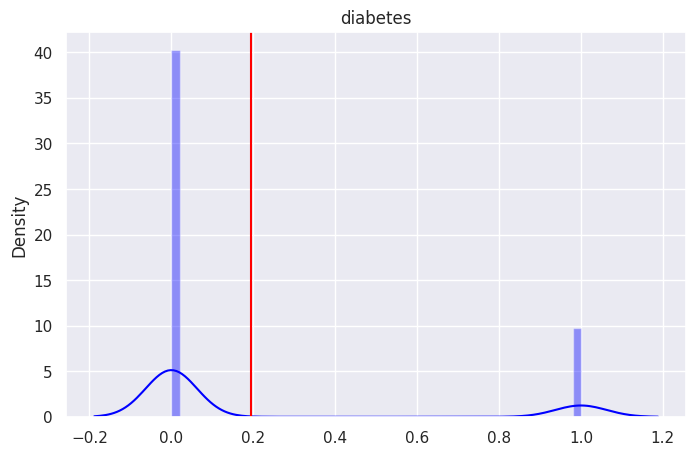

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


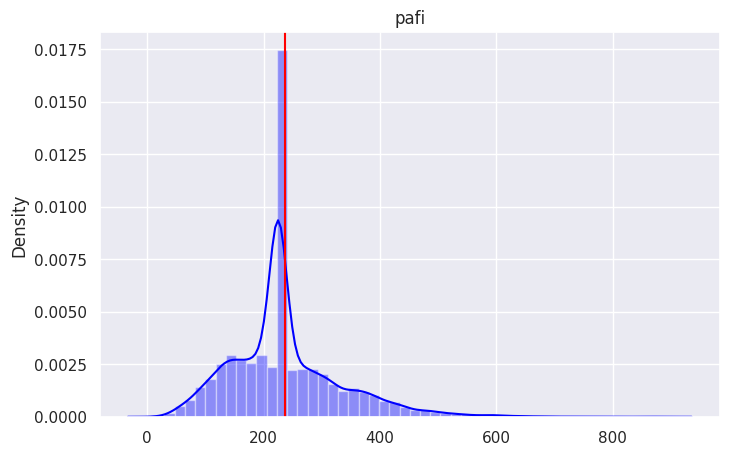

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


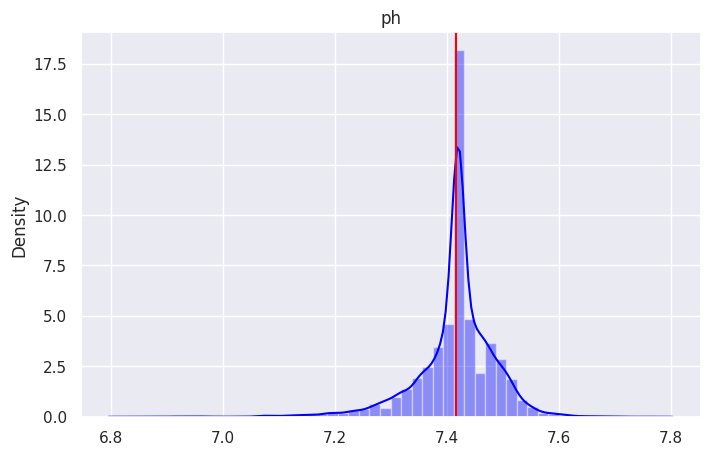

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


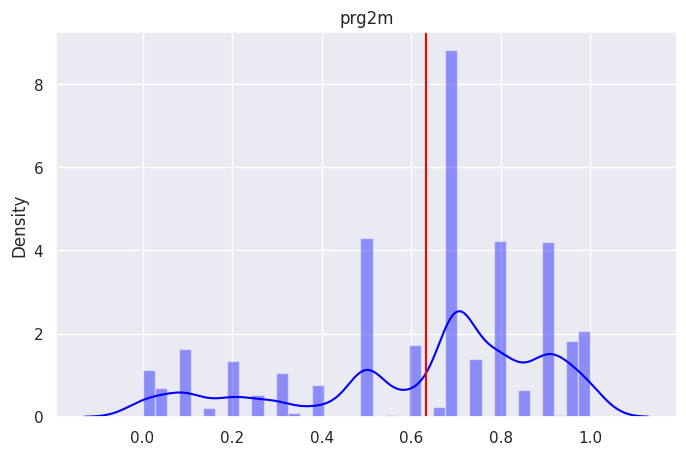

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


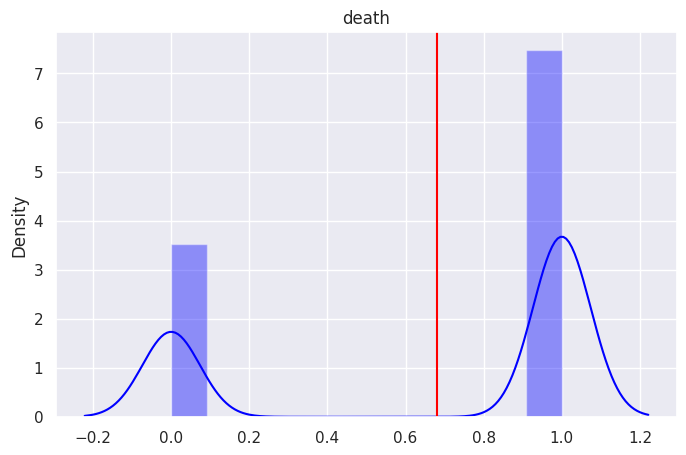

<ipython-input-13-f44e9ed615ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


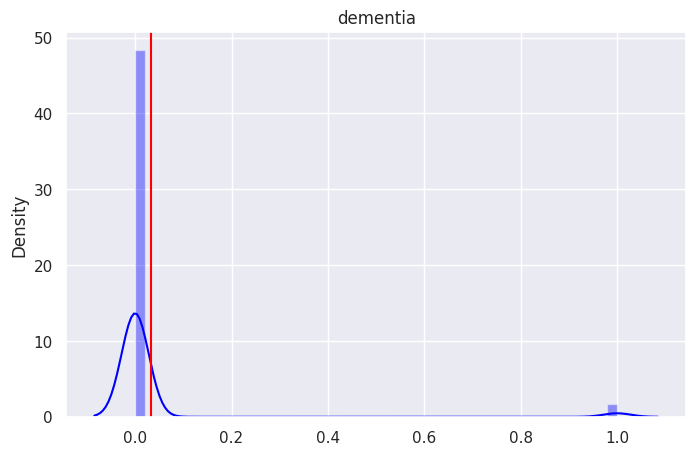

In [ ]:
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})


for n in numeric2:
    x = data[n].values
    sns.distplot(x, color = 'blue');

    # Calculating the mean
    mean = data[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

wblc
The meadian is:  10.5996094


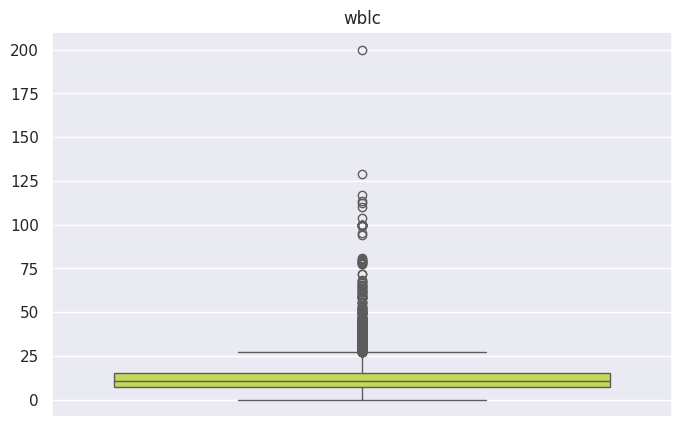

sod
The meadian is:  137.0


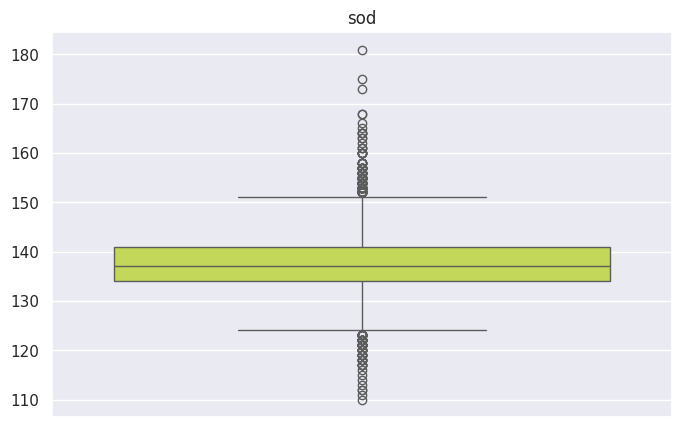

feat09
The meadian is:  1.029421689644338


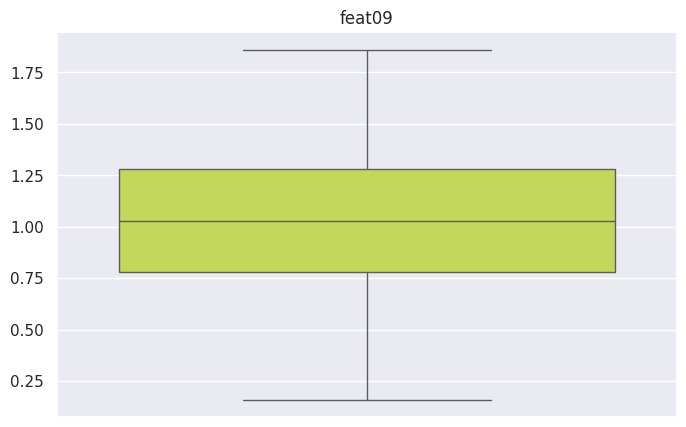

urine
The meadian is:  1975.0


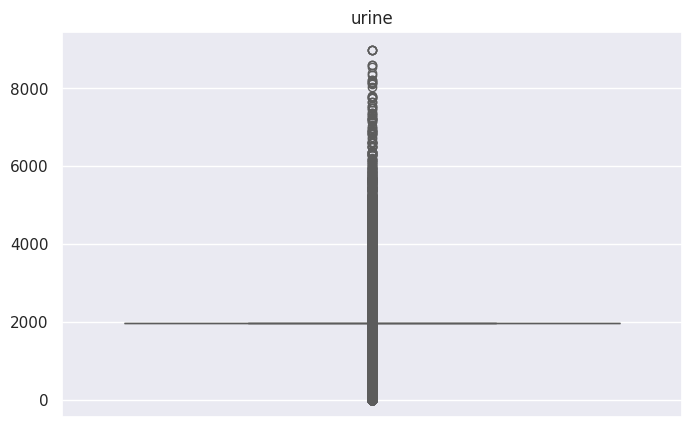

meanbp
The meadian is:  77.0


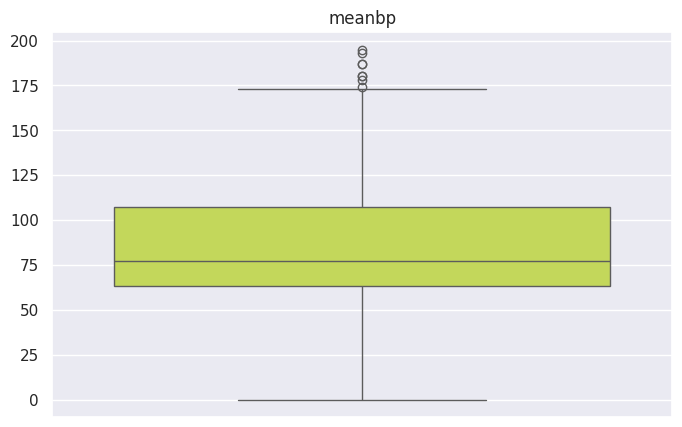

bili
The meadian is:  0.89990234


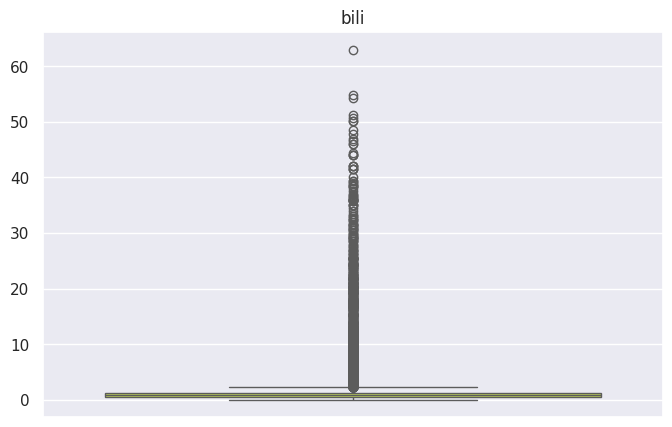

scoma
The meadian is:  0.0


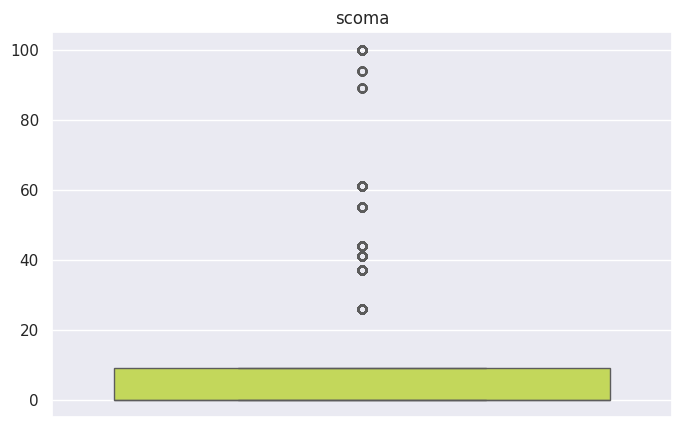

dnrday
The meadian is:  9.0


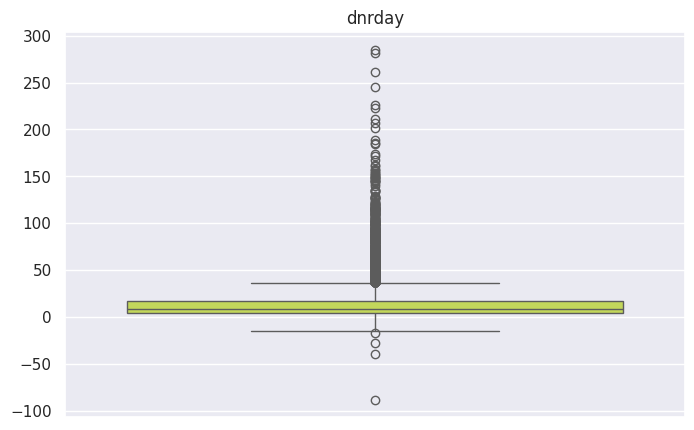

hrt
The meadian is:  100.0


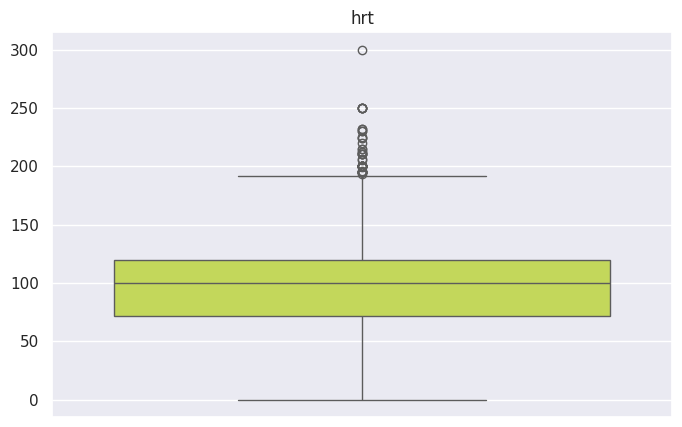

adlsc
The meadian is:  1.0


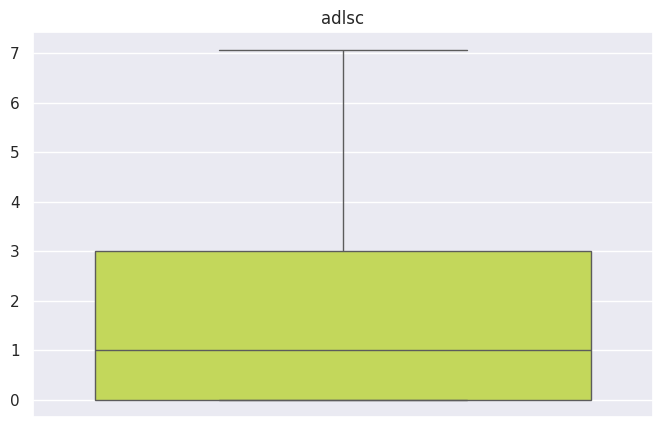

adls
The meadian is:  1.0


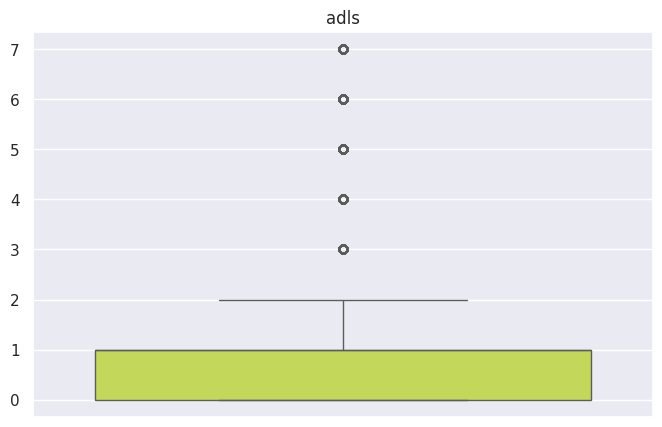

id
The meadian is:  5053.0


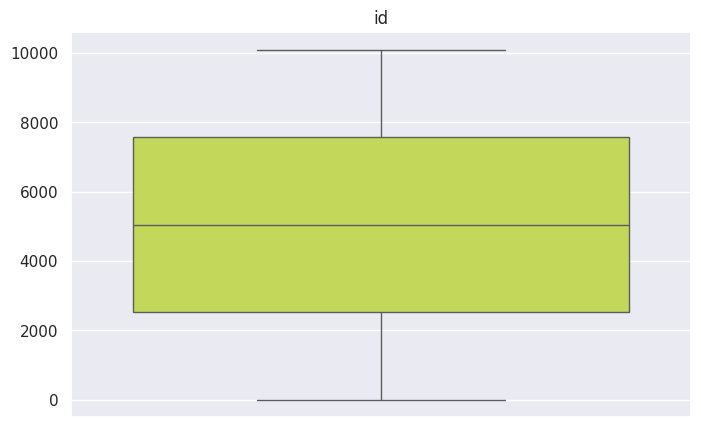

glucose
The meadian is:  134.0


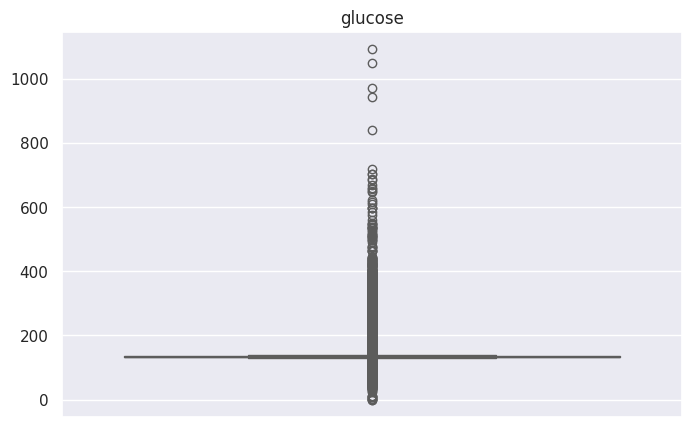

surv2m
The meadian is:  0.71496582


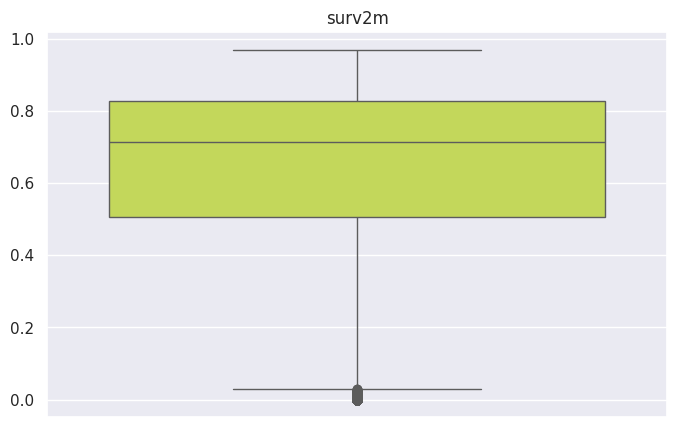

totcst
The meadian is:  14305.6953


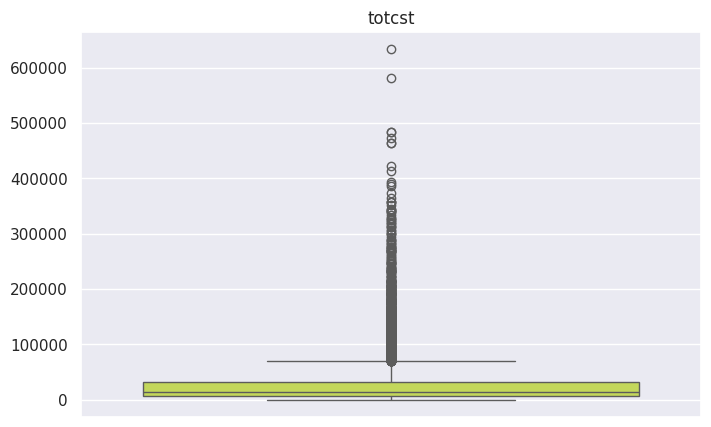

bun
The meadian is:  23.0


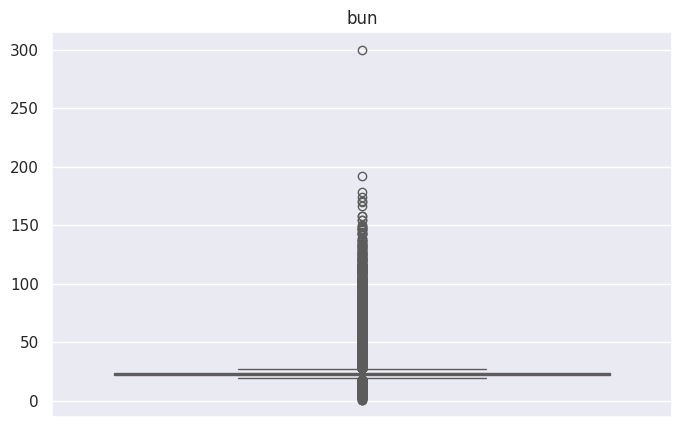

avtisst
The meadian is:  19.5


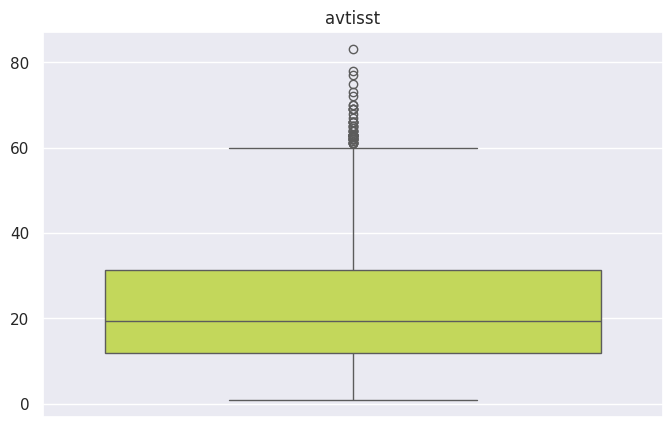

charges
The meadian is:  24806.0


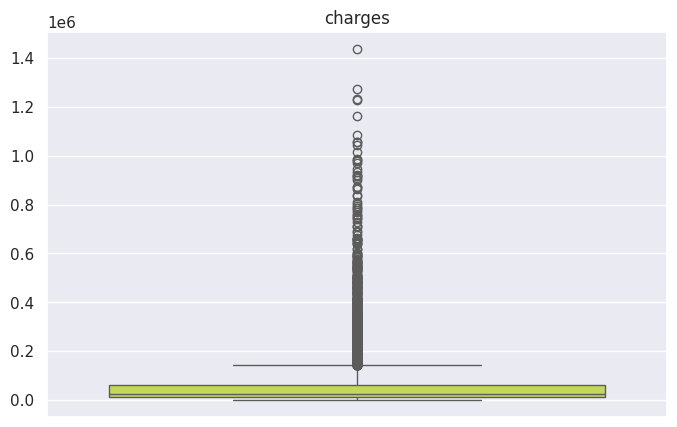

feat02
The meadian is:  1.0328653441384


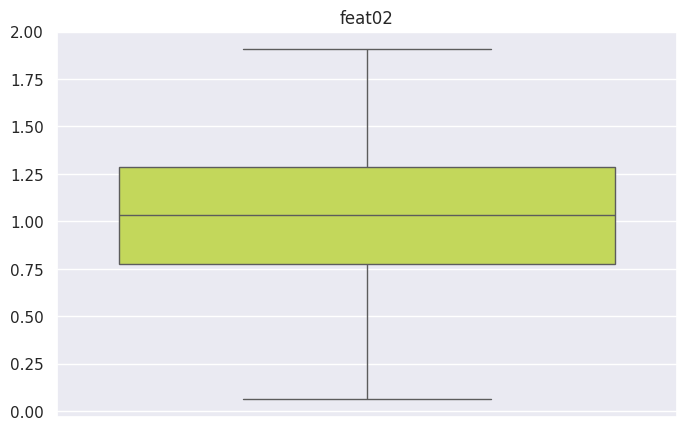

feat08
The meadian is:  0.992498371618944


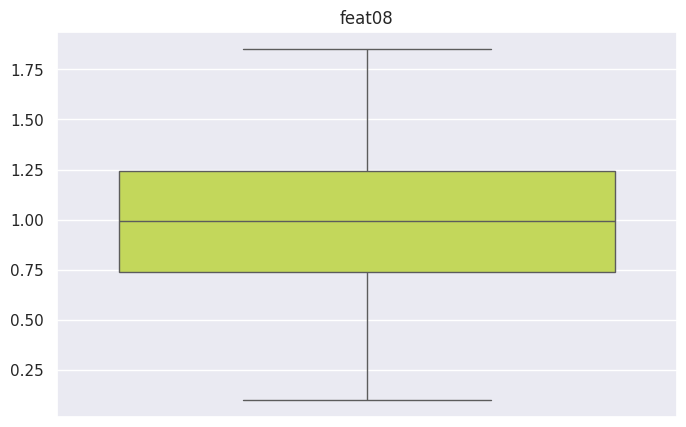

temp
The meadian is:  36.69531


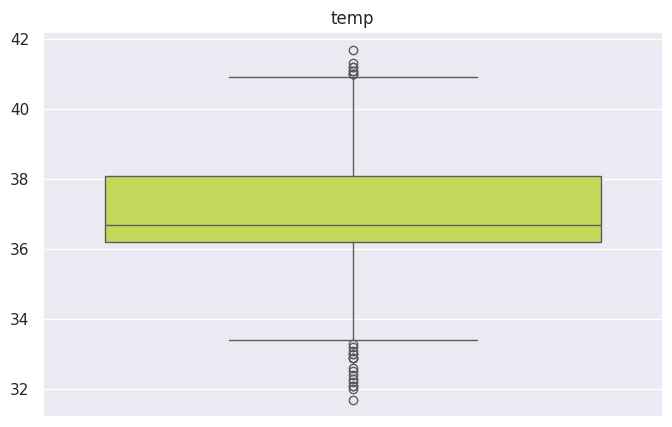

num.co
The meadian is:  2.0


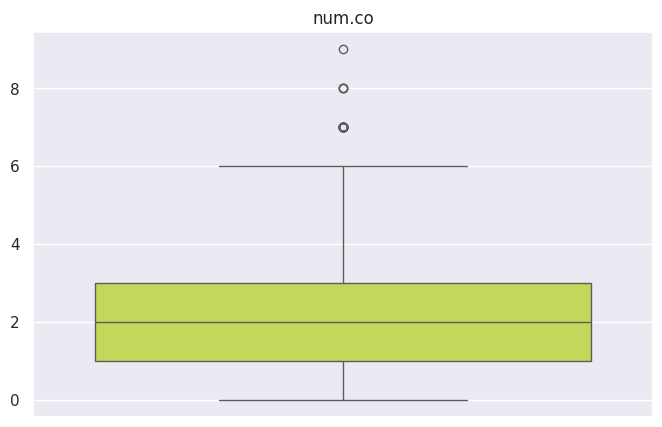

surv6m
The meadian is:  0.5724487305


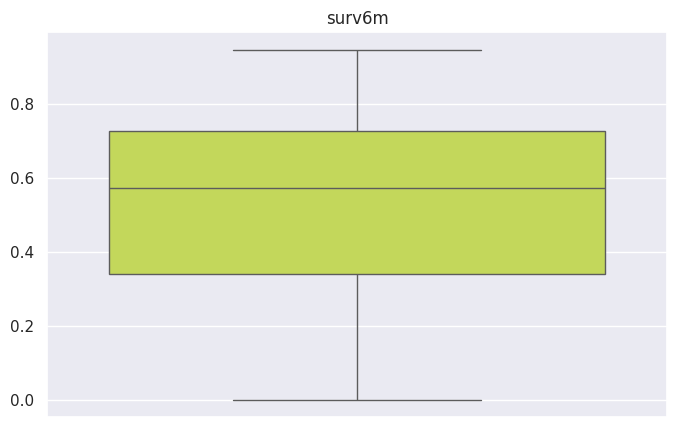

crea
The meadian is:  1.19995117


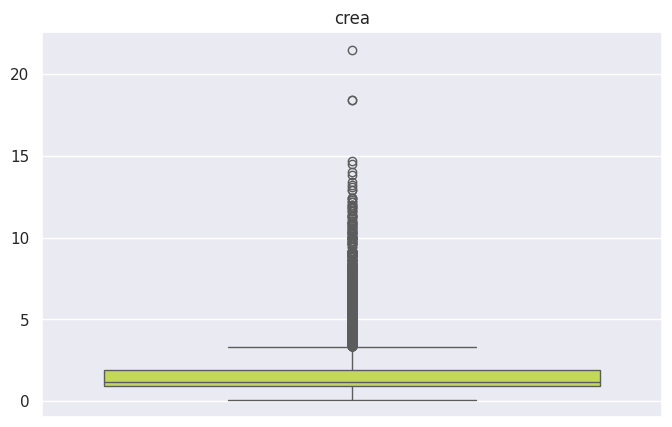

feat10
The meadian is:  0.9977529260900428


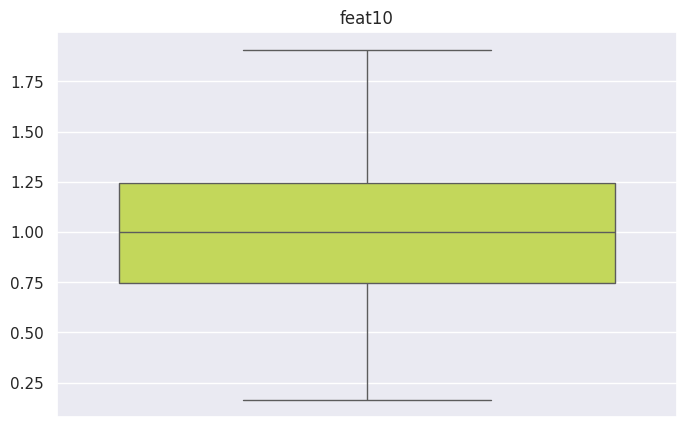

totmcst
The meadian is:  13103.3594


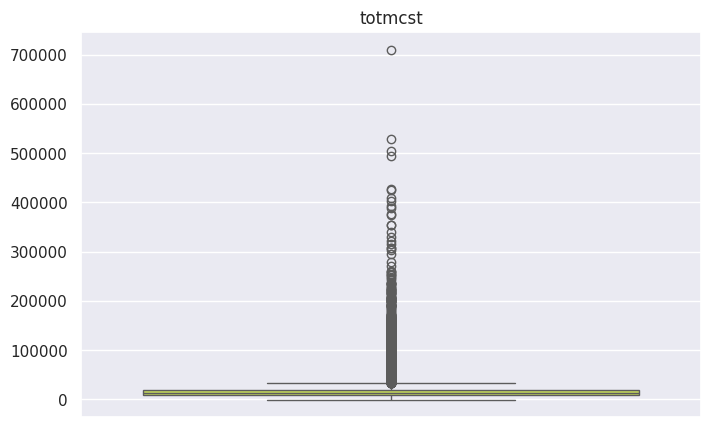

resp
The meadian is:  24.0


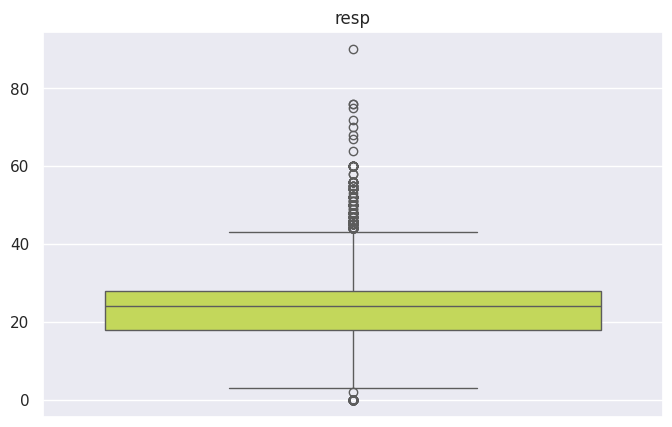

feat04
The meadian is:  0.5196569939728174


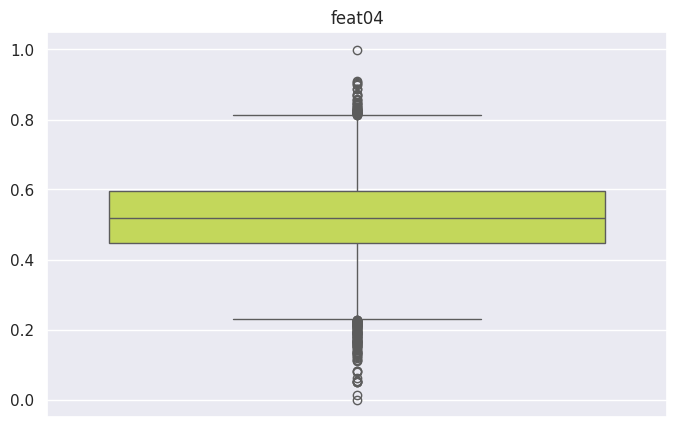

hday
The meadian is:  1.0


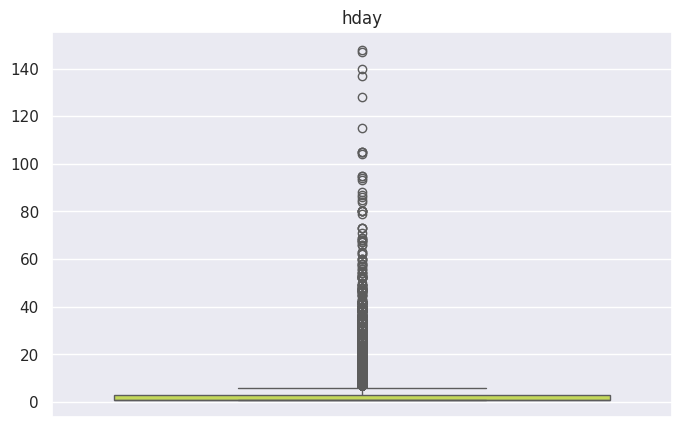

feat05
The meadian is:  0.505814056763987


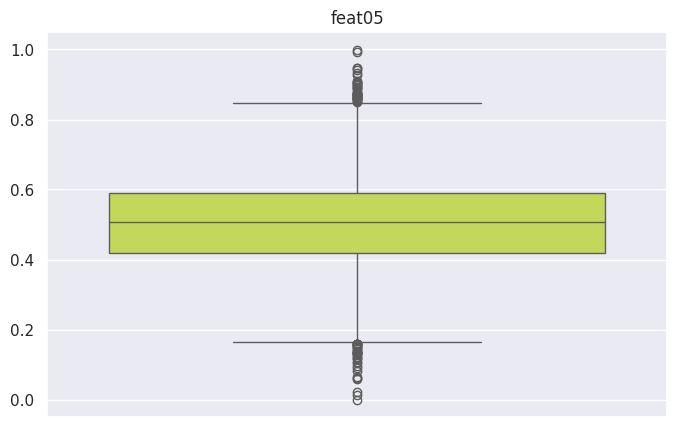

feat06
The meadian is:  1.0065609055650733


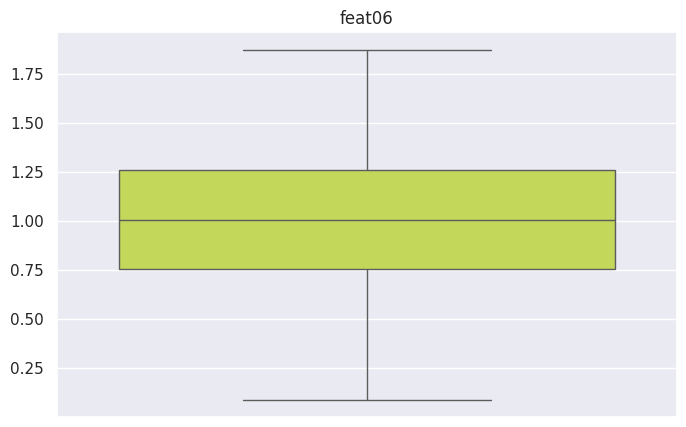

feat07
The meadian is:  0.9861886793554608


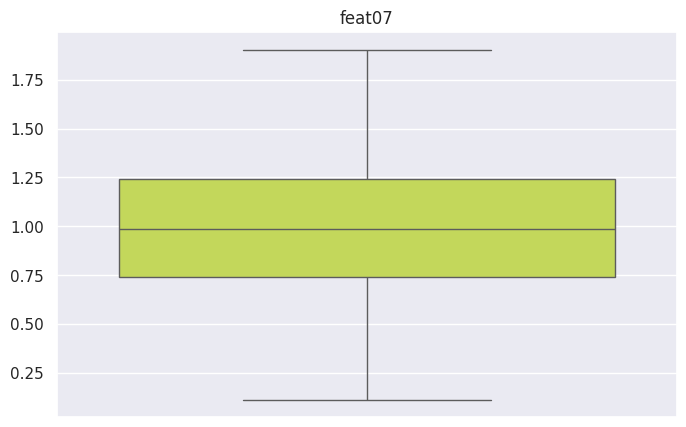

age
The meadian is:  64.849


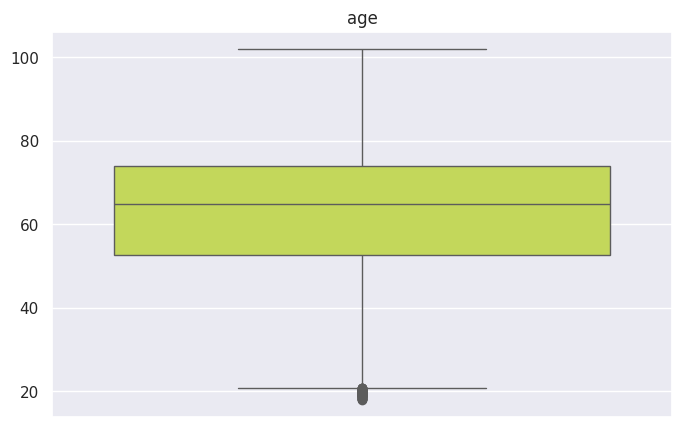

sps
The meadian is:  23.8984375


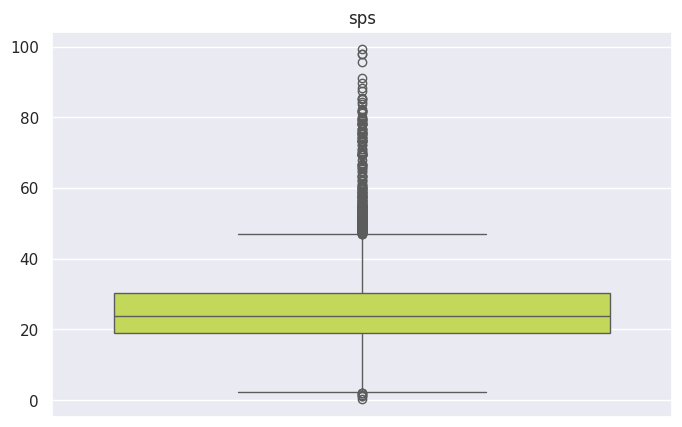

aps
The meadian is:  34.0


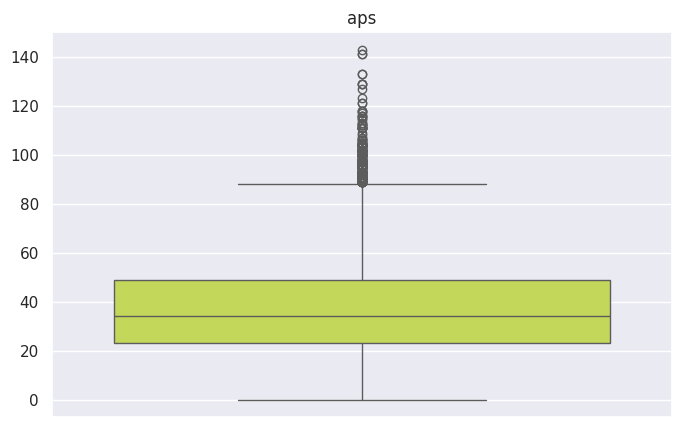

feat01
The meadian is:  1.0472416664628823


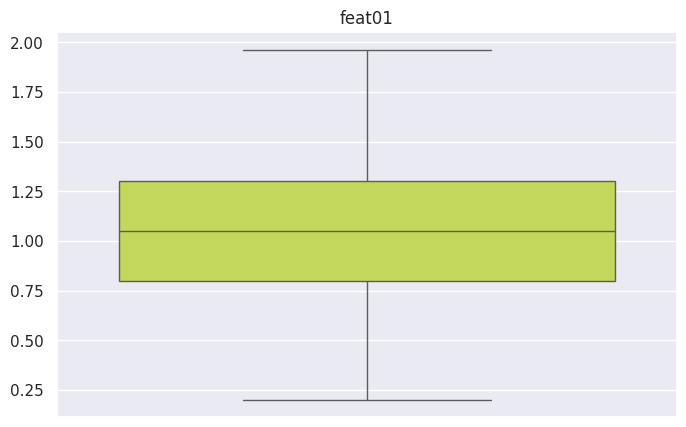

feat03
The meadian is:  0.5242747945032669


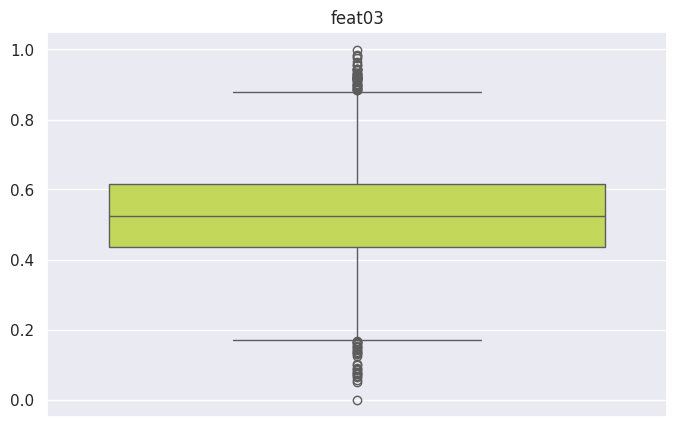

alb
The meadian is:  2.8999023


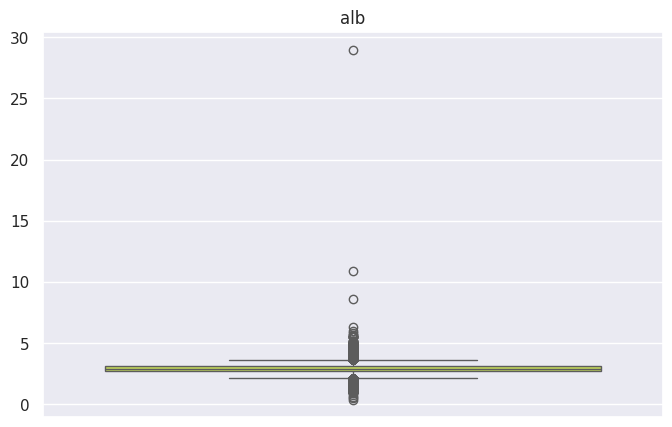

diabetes
The meadian is:  0.0


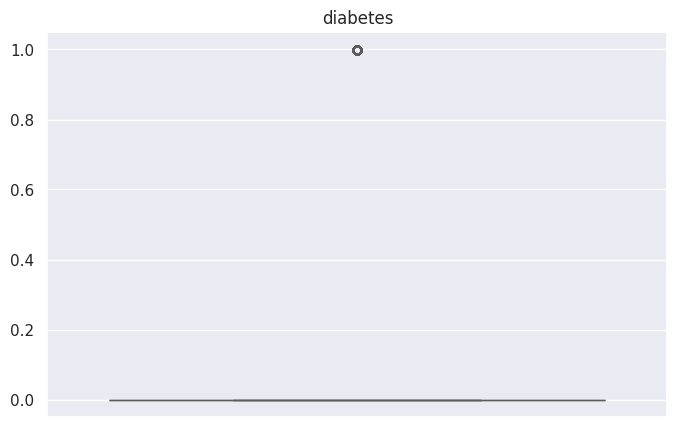

pafi
The meadian is:  225.0


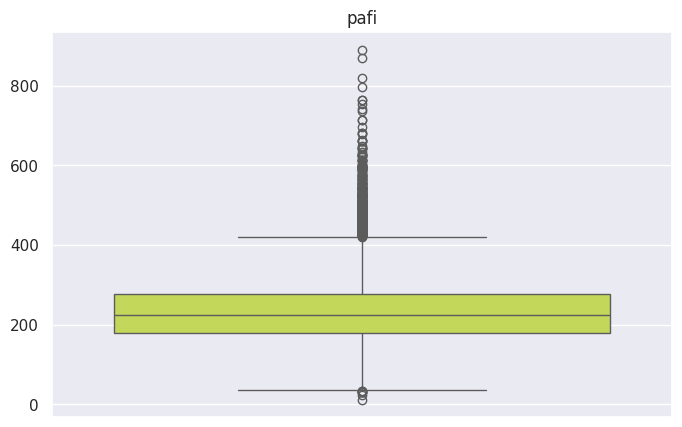

ph
The meadian is:  7.419922


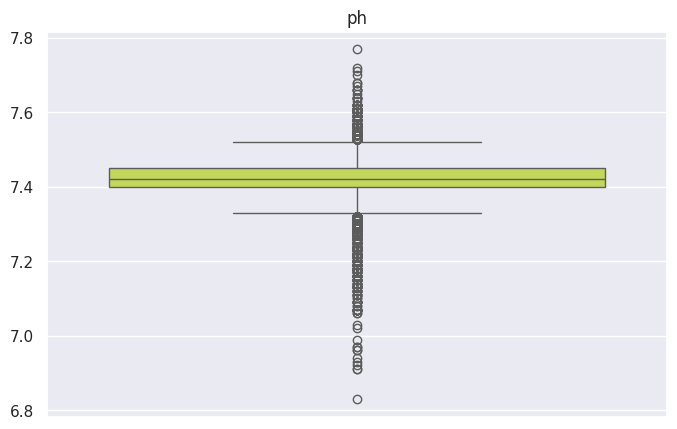

prg2m
The meadian is:  0.699999809


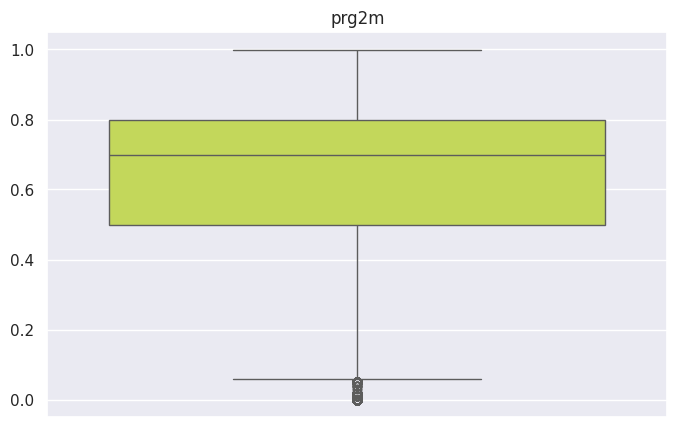

death
The meadian is:  1.0


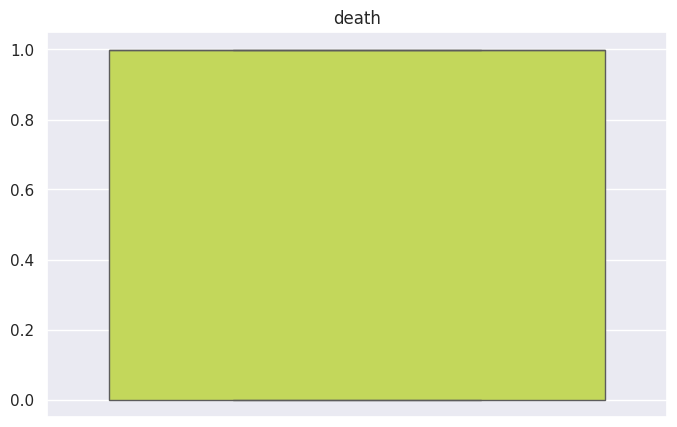

dementia
The meadian is:  0.0


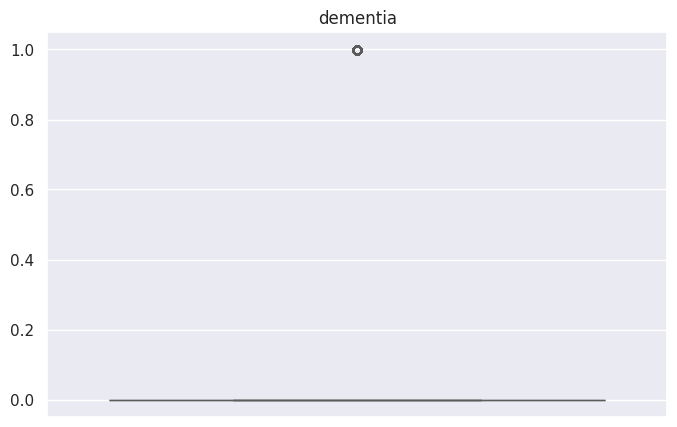

In [ ]:
# Example 11 - Investigating the outliers

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in numeric2:
    print(c)
    x = data[c].values
    ax = sns.boxplot(x, color = '#D1EC46')
    print('The meadian is: ', data[c].median())
    plt.title(c)
    plt.show()

# Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data[list(numeric2)] = scaler.fit_transform(data[list(numeric2)])

In [ ]:
data.head()

id  adlp      adls     adlsc       age       alb       aps   avtisst  \
0  0.000000     8  0.714286  0.706889  0.300790  0.097893  0.461538  0.638211   
1  0.000099     1  0.000000  0.000000  0.515811  0.087410  0.181818  0.207317   
2  0.000198     3  0.000000  0.000000  0.494607  0.062928  0.090909  0.158537   
3  0.000297     8  0.142857  0.305743  0.549269  0.087410  0.419580  0.481707   
4  0.000396     8  0.285714  0.282756  0.599480  0.083910  0.356643  0.414634   

       bili       bun  ca   charges      crea  death  dementia  diabetes  dnr  \
0  0.023845  0.267559   1  0.092481  0.130837    1.0       0.0       0.0    0   
1  0.012717  0.073579   0  0.001802  0.032707    1.0       0.0       0.0    2   
2  0.081069  0.304348   1  0.002701  0.387778    0.0       0.0       0.0    2   
3  0.006359  0.133779   1  0.194527  0.238282    1.0       0.0       0.0    0   
4  0.025437  0.160535   1  0.014656  0.065421    1.0       0.0       1.0    2   

     dnrday  dzclass  dzgroup  edu    feat01    feat02    feat03    feat04  \
0  0.268097        0        0   29  0.760180  0.268127  0.667354  0.384055   
1  0.252011        2        6    2  0.367314  0.275521  0.625900  0.460354   
2  0.249330        1        2   28  0.817450  0.244128  0.408856  0.508101   
3  0.254692        0        0    4  0.509457  0.335757  0.617119  0.470901   
4  0.262735        0        0    4  0.256185  0.328772  0.628146  0.656311   

     feat05    feat06    feat07    feat08    feat09    feat10   glucose  \
0  0.251228  0.663199  0.386465  0.554047  0.568580  0.520288  0.194139   
1  0.562102  0.366317  0.518498  0.603732  0.639275  0.342170  0.122711   
2  0.778078  0.237434  0.479198  0.436200  0.353480  0.382564  0.102564   
3  0.288910  0.454604  0.641479  0.267006  0.667629  0.523300  0.249084   
4  0.309162  0.287013  0.113293  0.581388  0.481855  0.385410  0.182234   

       hday  hospdead       hrt  income    meanbp    num.co      pafi  \
0  0.006803         1  0.383333       4  0.682051  0.000000  0.281486   
1  0.000000         0  0.333333       1  0.374359  0.222222  0.242493   
2  0.000000         0  0.133333       4  0.153846  0.444444  0.130532   
3  0.353741         1  0.383333       3  0.256410  0.111111  0.485058   
4  0.000000         0  0.466667       0  0.584615  0.444444  0.259570   

         ph  prg2m  prg6m  race      resp  scoma  sex  sfdm2       sod  \
0  0.691589   0.50     45     4  0.366667   0.00    1      0  0.492958   
1  0.628245   0.90     62     4  0.311111   0.00    1      4  0.338028   
2  0.521288   0.70     82     2  0.133333   0.00    1      4  0.309859   
3  0.638630   0.10     21     4  0.300000   0.00    0      0  0.521127   
4  0.308411   0.35     31     4  0.311111   0.41    0      4  0.478873   

        sps    surv2m    surv6m      temp    totcst   totmcst     urine  \
0  0.287907  0.825698  0.775303  0.770223  0.114698  0.089987  0.246111   
1  0.219204  0.626730  0.308009  0.370067  0.004483  0.001271  0.219444   
2  0.186885  0.925749  0.873294  0.620164  0.004662  0.005155  0.000000   
3  0.336406  0.527813  0.416624  0.409926  0.251101  0.224214  0.078333   
4  0.329303  0.445318  0.329063  0.589684  0.022554  0.023440  0.219444   

       wblc  
0  0.042500  
1  0.028999  
2  0.216992  
3  0.124492  
4  0.097988

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column in strings2:
  data[column]=le.fit_transform(data[column])

In [ ]:
data.head()

id  adlp      adls     adlsc       age       alb       aps   avtisst  \
0  0.000000     8  0.714286  0.706889  0.300790  0.097893  0.461538  0.638211   
1  0.000099     1  0.000000  0.000000  0.515811  0.087410  0.181818  0.207317   
2  0.000198     3  0.000000  0.000000  0.494607  0.062928  0.090909  0.158537   
3  0.000297     8  0.142857  0.305743  0.549269  0.087410  0.419580  0.481707   
4  0.000396     8  0.285714  0.282756  0.599480  0.083910  0.356643  0.414634   

       bili       bun  ca   charges      crea  death  dementia  diabetes  dnr  \
0  0.023845  0.267559   1  0.092481  0.130837    1.0       0.0       0.0    0   
1  0.012717  0.073579   0  0.001802  0.032707    1.0       0.0       0.0    2   
2  0.081069  0.304348   1  0.002701  0.387778    0.0       0.0       0.0    2   
3  0.006359  0.133779   1  0.194527  0.238282    1.0       0.0       0.0    0   
4  0.025437  0.160535   1  0.014656  0.065421    1.0       0.0       1.0    2   

     dnrday  dzclass  dzgroup  edu    feat01    feat02    feat03    feat04  \
0  0.268097        0        0   29  0.760180  0.268127  0.667354  0.384055   
1  0.252011        2        6    2  0.367314  0.275521  0.625900  0.460354   
2  0.249330        1        2   28  0.817450  0.244128  0.408856  0.508101   
3  0.254692        0        0    4  0.509457  0.335757  0.617119  0.470901   
4  0.262735        0        0    4  0.256185  0.328772  0.628146  0.656311   

     feat05    feat06    feat07    feat08    feat09    feat10   glucose  \
0  0.251228  0.663199  0.386465  0.554047  0.568580  0.520288  0.194139   
1  0.562102  0.366317  0.518498  0.603732  0.639275  0.342170  0.122711   
2  0.778078  0.237434  0.479198  0.436200  0.353480  0.382564  0.102564   
3  0.288910  0.454604  0.641479  0.267006  0.667629  0.523300  0.249084   
4  0.309162  0.287013  0.113293  0.581388  0.481855  0.385410  0.182234   

       hday  hospdead       hrt  income    meanbp    num.co      pafi  \
0  0.006803         1  0.383333       4  0.682051  0.000000  0.281486   
1  0.000000         0  0.333333       1  0.374359  0.222222  0.242493   
2  0.000000         0  0.133333       4  0.153846  0.444444  0.130532   
3  0.353741         1  0.383333       3  0.256410  0.111111  0.485058   
4  0.000000         0  0.466667       0  0.584615  0.444444  0.259570   

         ph  prg2m  prg6m  race      resp  scoma  sex  sfdm2       sod  \
0  0.691589   0.50     45     4  0.366667   0.00    1      0  0.492958   
1  0.628245   0.90     62     4  0.311111   0.00    1      4  0.338028   
2  0.521288   0.70     82     2  0.133333   0.00    1      4  0.309859   
3  0.638630   0.10     21     4  0.300000   0.00    0      0  0.521127   
4  0.308411   0.35     31     4  0.311111   0.41    0      4  0.478873   

        sps    surv2m    surv6m      temp    totcst   totmcst     urine  \
0  0.287907  0.825698  0.775303  0.770223  0.114698  0.089987  0.246111   
1  0.219204  0.626730  0.308009  0.370067  0.004483  0.001271  0.219444   
2  0.186885  0.925749  0.873294  0.620164  0.004662  0.005155  0.000000   
3  0.336406  0.527813  0.416624  0.409926  0.251101  0.224214  0.078333   
4  0.329303  0.445318  0.329063  0.589684  0.022554  0.023440  0.219444   

       wblc  
0  0.042500  
1  0.028999  
2  0.216992  
3  0.124492  
4  0.097988

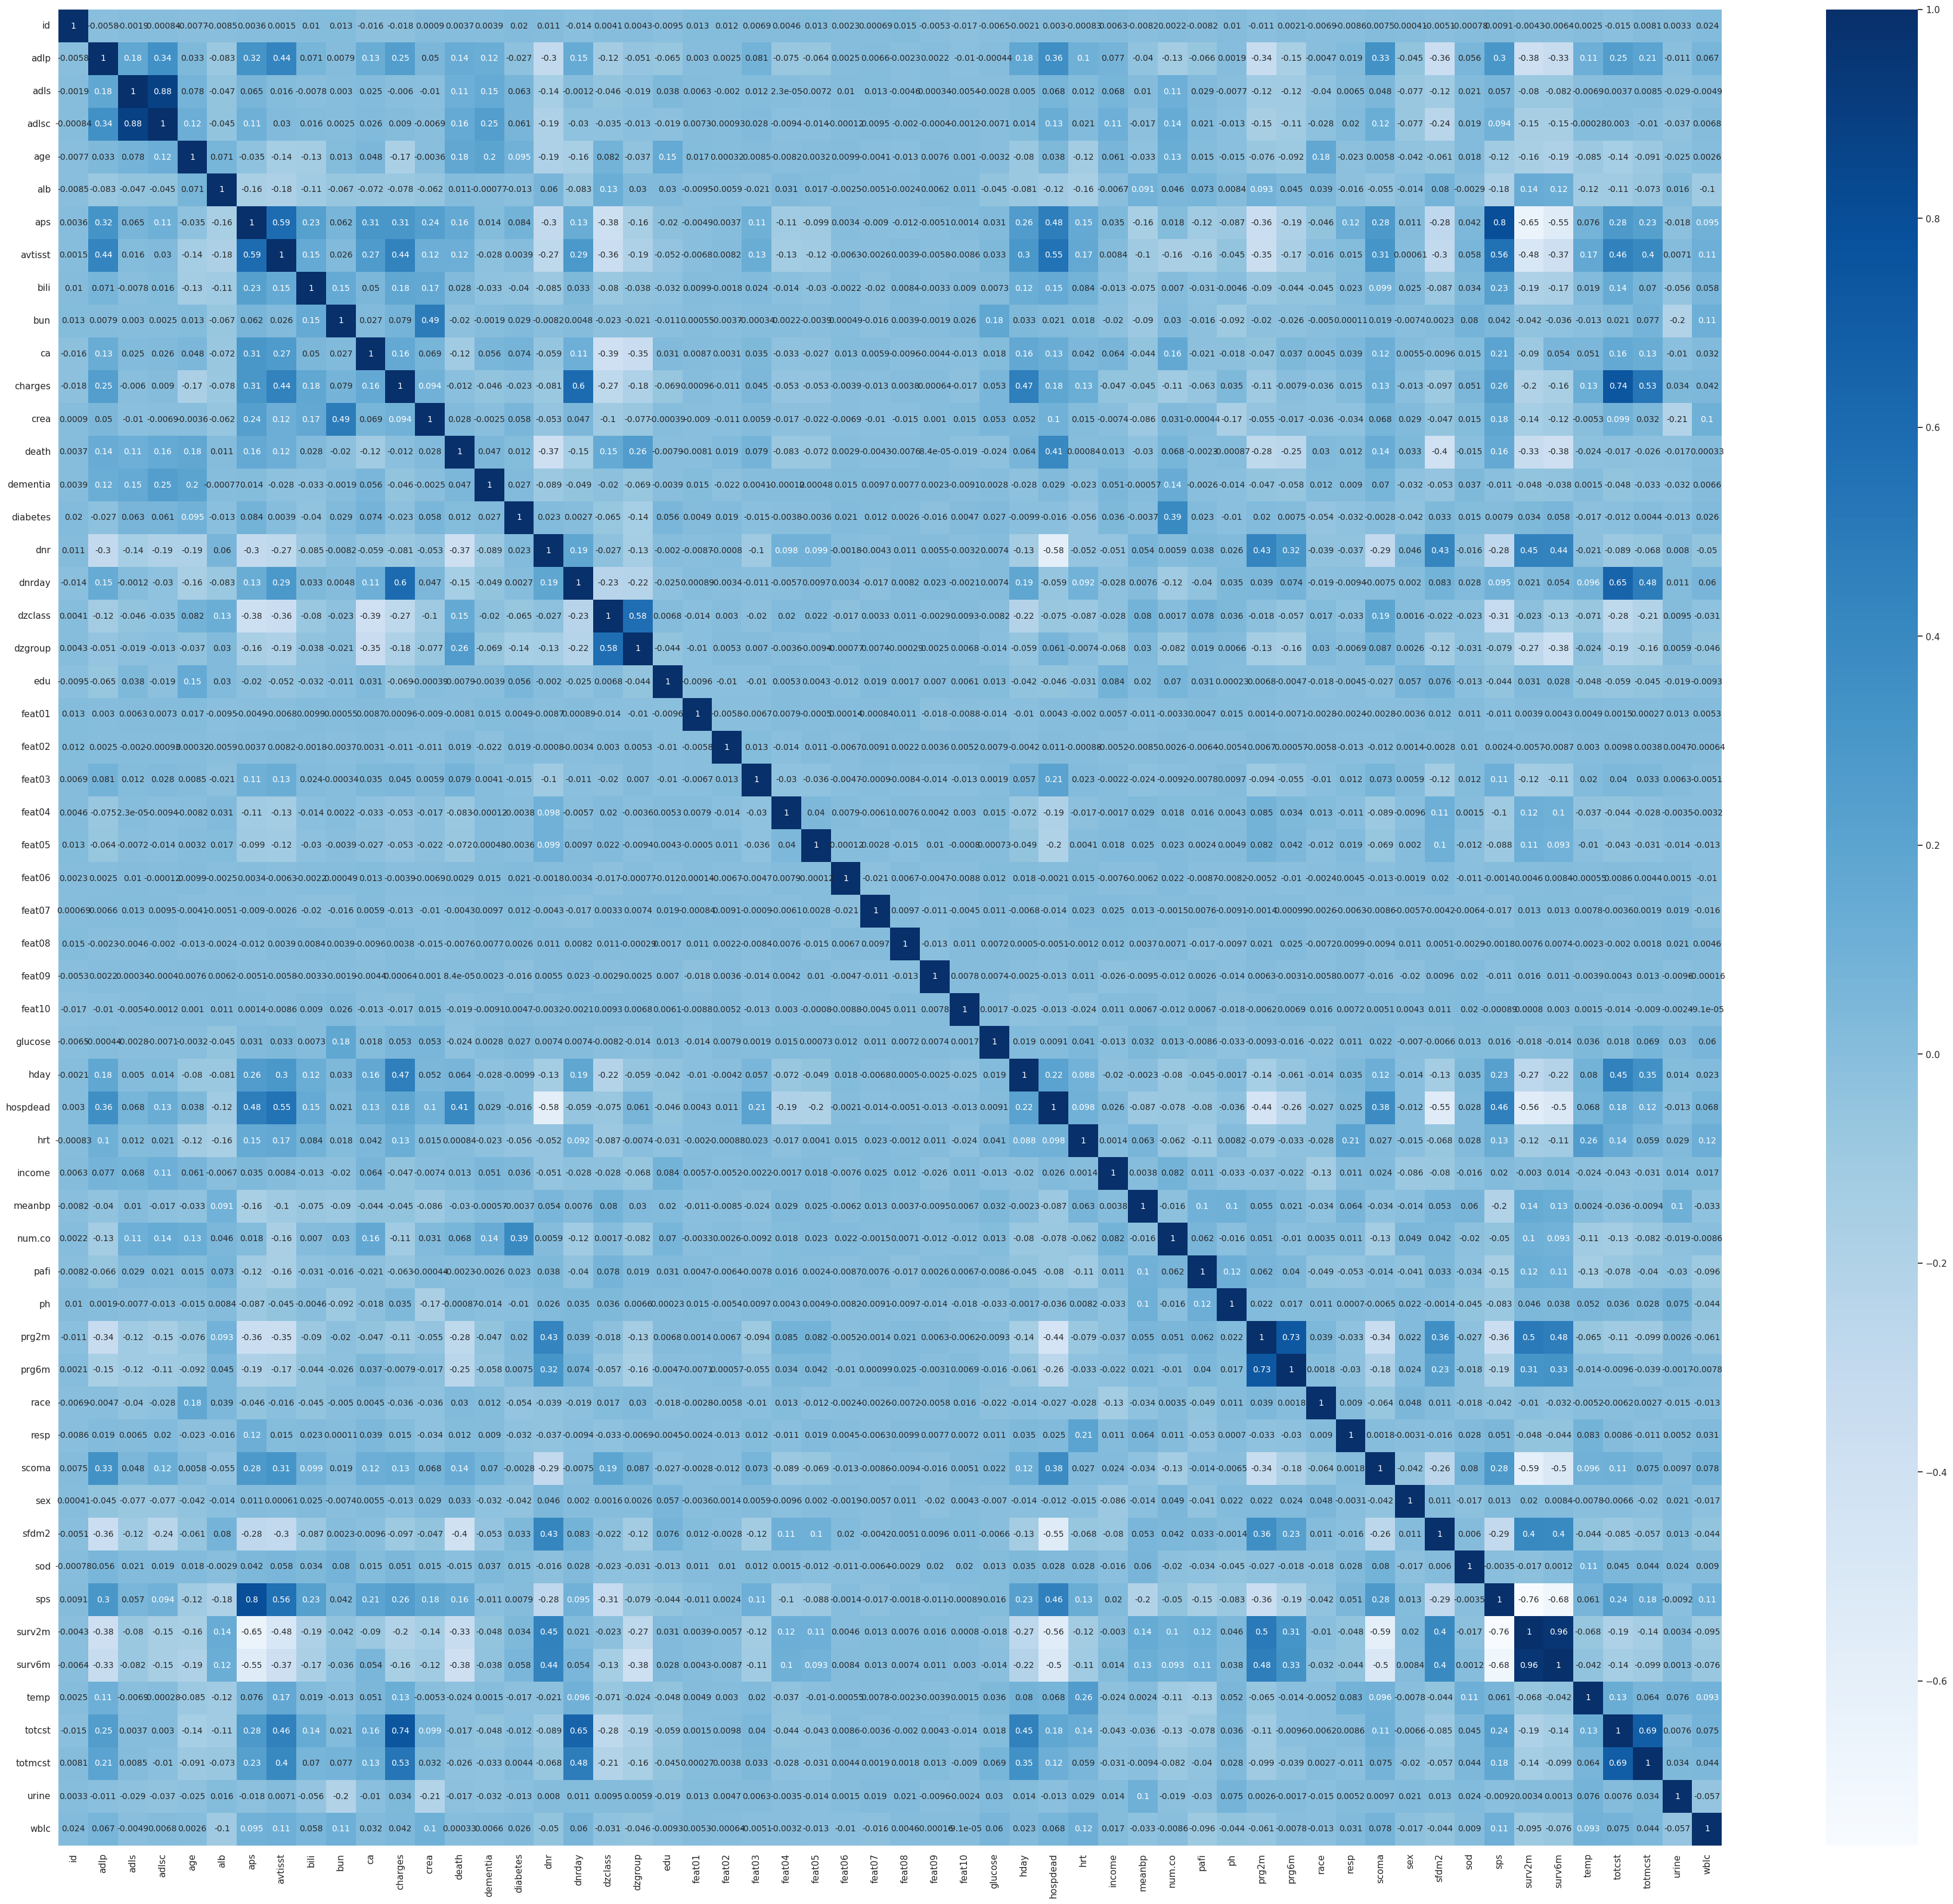

In [ ]:

sns.set(rc={'figure.figsize':(45,40)})

pc = data.corr()

cols = data.columns

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues")


In [ ]:
print(data.corr()['sfdm2'].sort_values())

hospdead   -0.548099
death      -0.404498
adlp       -0.361316
avtisst    -0.297343
sps        -0.291660
aps        -0.279112
scoma      -0.258777
adlsc      -0.239856
hday       -0.128383
feat03     -0.119815
dzgroup    -0.119388
adls       -0.117622
charges    -0.096855
bili       -0.086694
totcst     -0.084935
income     -0.079940
hrt        -0.067837
age        -0.060928
totmcst    -0.057405
dementia   -0.053152
crea       -0.046971
temp       -0.044387
wblc       -0.043917
dzclass    -0.022209
resp       -0.015650
ca         -0.009582
glucose    -0.006630
id         -0.005116
feat07     -0.004234
feat02     -0.002825
ph         -0.001405
bun         0.002287
feat08      0.005142
sod         0.005978
feat09      0.009608
race        0.010823
sex         0.011019
feat10      0.011434
feat01      0.011566
urine       0.013416
feat06      0.019857
diabetes    0.032718
pafi        0.033252
num.co      0.042005
meanbp      0.052737
edu         0.076092
alb         0.079856
dnrday      0

# Traintest Split

In [ ]:
y = data['sfdm2']

In [ ]:
X, X_test, y, y_test = train_test_split(data.drop(['id','sfdm2'], axis = 1).values, y, test_size=0.2, random_state=42)

# Feature Selection

In [ ]:
#Before trying anything else lets train a simple DTC and check which features hold more importance with the target variable in the model coefficents.
from sklearn.tree import DecisionTreeClassifier
print(X.shape)
print(y.shape)

# Run a Tree-based estimators (i.e. decision trees & random forests)
dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)


# Calculating FI
for i, column in enumerate(data.drop(['id','sfdm2'], axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))

    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})

    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi


# Ordering the data

final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()
print(final_fi)

(8084, 54)
(8084,)
Importance of feature adlp:, 0.040
Importance of feature adls:, 0.037
Importance of feature adlsc:, 0.069
Importance of feature age:, 0.013
Importance of feature alb:, 0.010
Importance of feature aps:, 0.010
Importance of feature avtisst:, 0.016
Importance of feature bili:, 0.006
Importance of feature bun:, 0.007
Importance of feature ca:, 0.002
Importance of feature charges:, 0.021
Importance of feature crea:, 0.007
Importance of feature death:, 0.035
Importance of feature dementia:, 0.001
Importance of feature diabetes:, 0.001
Importance of feature dnr:, 0.022
Importance of feature dnrday:, 0.078
Importance of feature dzclass:, 0.001
Importance of feature dzgroup:, 0.000
Importance of feature edu:, 0.016
Importance of feature feat01:, 0.004
Importance of feature feat02:, 0.011
Importance of feature feat03:, 0.010
Importance of feature feat04:, 0.011
Importance of feature feat05:, 0.008
Importance of feature feat06:, 0.010
Importance of feature feat07:, 0.008
Import

In [ ]:
#lets also check the decision tree model results
dt.score(X,y)

0.8123453735774369

In [ ]:
prediction= dt.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))


              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1021
           1       0.00      0.00      0.00         9
           2       0.30      0.14      0.19       130
           3       0.40      0.33      0.36       213
           4       0.63      0.79      0.70       648

    accuracy                           0.69      2021
   macro avg       0.43      0.41      0.41      2021
weighted avg       0.68      0.69      0.68      2021



In [ ]:
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

# running the model
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)


y_pred = clf.predict(X_test)
print('Score', clf.score(X, y))

pred_proba_t = clf.predict_proba(X)
log_loss = log_loss(y, pred_proba_t)
log_loss


print('Log Loss', log_loss)

Score 0.704477981197427
Log Loss 0.8569800619017197


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79      1021
           1       0.00      0.00      0.00         9
           2       0.25      0.03      0.05       130
           3       0.41      0.20      0.27       213
           4       0.61      0.79      0.69       648

    accuracy                           0.68      2021
   macro avg       0.41      0.37      0.36      2021
weighted avg       0.65      0.68      0.65      2021



# Trying few available models

In [ ]:
import warnings
from sklearn.metrics import accuracy_score
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
# Suppress convergence warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)
models = []
models.append(("LogisticRegression", LogisticRegression(max_iter=1000)))
models.append(("SVC", SVC()))
models.append(("LinearSVC", LinearSVC(max_iter=5000)))
models.append(("KNeighbors", KNeighborsClassifier()))
models.append(("DecisionTree", DecisionTreeClassifier()))
models.append(("RandomForest", RandomForestClassifier()))
rf2 = RandomForestClassifier(n_estimators=100, criterion='gini',
                              max_depth=10, random_state=0, max_features=None)
models.append(("RandomForest2", rf2))
models.append(("MLPClassifier", MLPClassifier(solver='lbfgs', random_state=0, max_iter=1000)))

results_train = []  # To store training accuracy scores
results_test = []   # To store testing accuracy scores
names = []

for name, model in models:
    print(name, '\n')

    # Training accuracy using cross_val_score
    result_train = cross_val_score(model, X, y, cv=3)
    print("Training Accuracy:", result_train.mean())

    # Fitting the model on the training data
    model.fit(X,y)

    # Testing accuracy
    y_pred_test = model.predict(X_test)
    result_test = accuracy_score(y_test, y_pred_test)
    print("Testing Accuracy:", result_test)

    # Storing results
    names.append(name)
    results_train.append(result_train.mean())
    results_test.append(result_test)


LogisticRegression 

Training Accuracy: 0.6893859278205445
Testing Accuracy: 0.6887679366650173
SVC 

Training Accuracy: 0.6121973794579585
Testing Accuracy: 0.6254329539831767
LinearSVC 

Training Accuracy: 0.6460958845305012
Testing Accuracy: 0.607619990103909
KNeighbors 

Training Accuracy: 0.606877602900511
Testing Accuracy: 0.6214745175655616
DecisionTree 

Training Accuracy: 0.6218464358139827
Testing Accuracy: 0.6274121721919842
RandomForest 

Training Accuracy: 0.7241463312732801
Testing Accuracy: 0.7441860465116279
RandomForest2 

Training Accuracy: 0.7165999800743675
Testing Accuracy: 0.7253834735279565
MLPClassifier 

Training Accuracy: 0.691365452167234
Testing Accuracy: 0.6877783275606135


# Optimization

In [ ]:
################################################    OPTIMISED   ############################################################

from sklearn.model_selection import RandomizedSearchCV
import xgboost
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss


classifier=xgboost.XGBClassifier(learning_rate=0.02, n_estimators=600, nthread=1)

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7,10],
    "gamma":[0.0,0.1,0.2,0.3,0.4,0.5, 1, 1.5, 2, 5],
    "colsample_bytree":[0.3,0.4,0.5,0.7, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0]}

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)

clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='roc_auc', cv=skf.split(X,y), verbose=3, n_jobs=4, random_state=34)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# fitting it
clf.fit(X,y)

# getting the model with the best parameters
clf.best_estimator_

final_model = clf.best_estimator_


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [ ]:
# fitting it
final_model.fit(X,y)
print('Score', final_model.score(X, y))

pred_proba_t = final_model.predict_proba(X)

log_loss = log_loss(y, pred_proba_t)
log_loss

print('Log Loss', log_loss)

Score 0.9470559129143988
Log Loss 0.27984971498900846


In [ ]:
clf.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None, nthread=1,
              num_parallel_tree=None, ...)

In [ ]:
print(classification_report(y_test,final_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1021
           1       0.00      0.00      0.00         9
           2       0.32      0.07      0.11       130
           3       0.57      0.32      0.41       213
           4       0.63      0.84      0.72       648

    accuracy                           0.72      2021
   macro avg       0.47      0.41      0.42      2021
weighted avg       0.70      0.72      0.70      2021



# Recursive Feature Selection

In [ ]:
from sklearn.feature_selection import RFE


estimator = final_model
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selector.support_

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [ ]:
data.drop(['id','sfdm2'],axis=1).columns[selector.support_]

Index(['adlp', 'adls', 'adlsc', 'death', 'dementia', 'dnr', 'dnrday',
       'hospdead', 'income', 'prg2m'],
      dtype='object')

In [ ]:
final_model.fit(selector.transform(X),y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None, nthread=1,
              num_parallel_tree=None, ...)

In [ ]:
print(classification_report(y_test,final_model.predict(selector.transform(X_test))))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1021
           1       0.00      0.00      0.00         9
           2       0.17      0.03      0.05       130
           3       0.50      0.27      0.35       213
           4       0.61      0.83      0.71       648

    accuracy                           0.71      2021
   macro avg       0.42      0.39      0.38      2021
weighted avg       0.68      0.71      0.68      2021



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Catboost

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool
model = CatBoostClassifier(
    iterations=100, depth=6, learning_rate=0.1,
   loss_function='MultiClass', verbose=False)

model.fit(X, y)
# make the prediction using the resulting model
preds_class = model.predict(X_test)
preds_proba = model.predict_proba(X_test)
print("class = ", preds_class)
print("proba = ", preds_proba)

class =  [[4]
 [4]
 [4]
 ...
 [0]
 [0]
 [4]]
proba =  [[0.239303 0.008501 0.072775 0.084710 0.594711]
 [0.148527 0.001634 0.068406 0.028925 0.752508]
 [0.305910 0.003157 0.133265 0.049091 0.508577]
 ...
 [0.967133 0.001501 0.005642 0.011924 0.013801]
 [0.437463 0.003261 0.044646 0.125779 0.388851]
 [0.372096 0.003630 0.052209 0.144337 0.427728]]


In [ ]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1021
           1       0.00      0.00      0.00         9
           2       0.20      0.01      0.01       130
           3       0.49      0.28      0.35       213
           4       0.63      0.84      0.72       648

    accuracy                           0.71      2021
   macro avg       0.43      0.39      0.38      2021
weighted avg       0.68      0.71      0.68      2021



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Post pres

In [ ]:
data

id  adlp      adls     adlsc       age       alb       aps  \
0      0.000000     8  0.714286  0.706889  0.300790  0.097893  0.461538   
1      0.000099     1  0.000000  0.000000  0.515811  0.087410  0.181818   
2      0.000198     3  0.000000  0.000000  0.494607  0.062928  0.090909   
3      0.000297     8  0.142857  0.305743  0.549269  0.087410  0.419580   
4      0.000396     8  0.285714  0.282756  0.599480  0.083910  0.356643   
...         ...   ...       ...       ...       ...       ...       ...   
10100  0.999604     8  0.000000  0.000000  0.527087  0.073428  0.230769   
10101  0.999703     8  0.142857  0.539003  0.857731  0.101393  0.482517   
10102  0.999802     8  0.142857  0.431934  0.492912  0.087410  0.069930   
10103  0.999901     8  1.000000  0.989645  0.852337  0.122375  0.167832   
10104  1.000000     8  0.857143  0.848267  0.488473  0.048945  0.342657   

        avtisst      bili       bun  ca   charges      crea  death  dementia  \
0      0.638211  0.023845  0.267559   1  0.092481  0.130837    1.0       0.0   
1      0.207317  0.012717  0.073579   0  0.001802  0.032707    1.0       0.0   
2      0.158537  0.081069  0.304348   1  0.002701  0.387778    0.0       0.0   
3      0.481707  0.006359  0.133779   1  0.194527  0.238282    1.0       0.0   
4      0.414634  0.025437  0.160535   1  0.014656  0.065421    1.0       0.0   
...         ...       ...       ...  ..       ...       ...    ...       ...   
10100  0.405488  0.027024  0.073579   1  0.081952  0.032707    1.0       0.0   
10101  0.524390  0.004769  0.167224   1  0.149272  0.121482    1.0       0.0   
10102  0.109756  0.003180  0.073579   0  0.009334  0.028036    1.0       0.0   
10103  0.298780  0.012717  0.063545   2  0.030071  0.028036    1.0       1.0   
10104  0.560976  0.009538  0.043478   0  0.009040  0.018692    1.0       0.0   

       diabetes  dnr    dnrday  dzclass  dzgroup  edu    feat01    feat02  \
0           0.0    0  0.268097        0        0   29  0.760180  0.268127   
1           0.0    2  0.252011        2        6    2  0.367314  0.275521   
2           0.0    2  0.249330        1        2   28  0.817450  0.244128   
3           0.0    0  0.254692        0        0    4  0.509457  0.335757   
4           1.0    2  0.262735        0        0    4  0.256185  0.328772   
...         ...  ...       ...      ...      ...  ...       ...       ...   
10100       0.0    2  0.426273        0        0    4  0.598188  0.374669   
10101       0.0    2  0.243968        0        0    4  0.609930  0.549316   
10102       0.0    2  0.270777        2        6    8  0.387771  0.274462   
10103       0.0    2  0.270777        0        0    4  0.669612  0.454632   
10104       0.0    0  0.243968        0        0    4  0.489482  0.706774   

         feat03    feat04    feat05    feat06    feat07    feat08    feat09  \
0      0.667354  0.384055  0.251228  0.663199  0.386465  0.554047  0.568580   
1      0.625900  0.460354  0.562102  0.366317  0.518498  0.603732  0.639275   
2      0.408856  0.508101  0.778078  0.237434  0.479198  0.436200  0.353480   
3      0.617119  0.470901  0.288910  0.454604  0.641479  0.267006  0.667629   
4      0.628146  0.656311  0.309162  0.287013  0.113293  0.581388  0.481855   
...         ...       ...       ...       ...       ...       ...       ...   
10100  0.339072  0.742330  0.576297  0.722472  0.239127  0.835337  0.520273   
10101  0.464025  0.234293  0.513609  0.148924  0.802538  0.492415  0.667907   
10102  0.751122  0.433204  0.615204  0.581846  0.374646  0.643590  0.508068   
10103  0.415309  0.519941  0.205473  0.297015  0.507512  0.421010  0.835579   
10104  0.463778  0.406670  0.368004  0.330312  0.523991  0.378933  0.451692   

         feat10   glucose      hday  hospdead       hrt  income    meanbp  \
0      0.520288  0.194139  0.006803         1  0.383333       4  0.682051   
1      0.342170  0.122711  0.000000         0  0.333333       1  0.374359   
2      0.382564  0.102564  0.000000         0 

In [ ]:
X=data.drop(['id','sfdm2','adlp','urine','glucose'],axis=1)
y= data['sfdm2']

In [ ]:
from imblearn.over_sampling import SMOTE
# Deal with imbalanced classes using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split on resampled data
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
num_classes=5

In [ ]:
# Convert labels to one-hot encoding
y_train_resampled_onehot = tf.keras.utils.to_categorical(y_train_resampled_np, num_classes=num_classes)
y_test_resampled_onehot = tf.keras.utils.to_categorical(y_test_resampled_np, num_classes=num_classes)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Convert data to NumPy arrays if not already
X_train_resampled_np = X_train_resampled.to_numpy()
y_train_resampled_np = y_train_resampled.to_numpy()
X_test_resampled_np = X_test_resampled.to_numpy()
y_test_resampled_np = y_test_resampled.to_numpy()


model = Sequential()
model.add(Dense(256, input_shape=(X_train_resampled_np.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(
    X_train_resampled_np, y_train_resampled_onehot,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_resampled_np, y_test_resampled_onehot)
print(f'Test Accuracy: {test_acc}')

Epoch 1/100
501/501 [==============================] - 3s 4ms/step - loss: 2.0113 - accuracy: 0.2331 - val_loss: 1.5747 - val_accuracy: 0.2365
Epoch 2/100
501/501 [==============================] - 2s 4ms/step - loss: 1.5505 - accuracy: 0.2614 - val_loss: 1.4858 - val_accuracy: 0.3164
Epoch 3/100
501/501 [==============================] - 2s 4ms/step - loss: 1.4483 - accuracy: 0.3306 - val_loss: 1.3642 - val_accuracy: 0.3906
Epoch 4/100
501/501 [==============================] - 2s 4ms/step - loss: 1.2812 - accuracy: 0.4527 - val_loss: 1.0728 - val_accuracy: 0.5852
Epoch 5/100
501/501 [==============================] - 2s 5ms/step - loss: 1.1271 - accuracy: 0.5350 - val_loss: 0.9967 - val_accuracy: 0.6066
Epoch 6/100
501/501 [==============================] - 2s 4ms/step - loss: 1.0609 - accuracy: 0.5621 - val_loss: 0.9639 - val_accuracy: 0.6019
Epoch 7/100
501/501 [==============================] - 2s 4ms/step - loss: 1.0172 - accuracy: 0.5847 - val_loss: 0.9216 - val_accuracy: 0.6304

In [ ]:
# Get predicted probabilities
y_pred_prob = model.predict(X_test_resampled_np)

# Get predicted classes
y_pred = tf.argmax(y_pred_prob, axis=1).numpy()

print("Classification Report:\n", classification_report(y_test_resampled_np, y_pred))

157/157 [==============================] - 0s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.57      0.71      1026
           1       0.98      1.00      0.99       966
           2       0.48      0.78      0.59       989
           3       0.73      0.61      0.66      1000
           4       0.63      0.58      0.60      1023

    accuracy                           0.70      5004
   macro avg       0.75      0.71      0.71      5004
weighted avg       0.75      0.70      0.71      5004



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the model
model = Sequential()
model.add(Dense(512, input_shape=(X_train_resampled_np.shape[1],), activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(256, activation='softmax', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_resampled_np, y_train_resampled_onehot,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=2
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_resampled_np, y_test_resampled_onehot)
print(f'Test Accuracy: {test_acc}')

Epoch 1/100
501/501 - 4s - loss: 1.2553 - accuracy: 0.4788 - val_loss: 1.1782 - val_accuracy: 0.5552 - 4s/epoch - 8ms/step
Epoch 2/100
501/501 - 2s - loss: 1.0161 - accuracy: 0.5907 - val_loss: 0.9466 - val_accuracy: 0.6206 - 2s/epoch - 4ms/step
Epoch 3/100
501/501 - 3s - loss: 0.9663 - accuracy: 0.6069 - val_loss: 0.8524 - val_accuracy: 0.6606 - 3s/epoch - 5ms/step
Epoch 4/100
501/501 - 2s - loss: 0.9202 - accuracy: 0.6303 - val_loss: 0.8222 - val_accuracy: 0.6698 - 2s/epoch - 5ms/step
Epoch 5/100
501/501 - 2s - loss: 0.9006 - accuracy: 0.6401 - val_loss: 0.8391 - val_accuracy: 0.6568 - 2s/epoch - 4ms/step
Epoch 6/100
501/501 - 2s - loss: 0.8675 - accuracy: 0.6506 - val_loss: 0.7907 - val_accuracy: 0.6798 - 2s/epoch - 4ms/step
Epoch 7/100
501/501 - 2s - loss: 0.8534 - accuracy: 0.6541 - val_loss: 0.7765 - val_accuracy: 0.6893 - 2s/epoch - 5ms/step
Epoch 8/100
501/501 - 3s - loss: 0.8272 - accuracy: 0.6648 - val_loss: 0.8409 - val_accuracy: 0.6728 - 3s/epoch - 6ms/step
Epoch 9/100
501/

In [ ]:
# Get predicted probabilities
y_pred_prob = model.predict(X_test_resampled_np)

# Get predicted classes
y_pred = tf.argmax(y_pred_prob, axis=1).numpy()

print("Classification Report:\n", classification_report(y_test_resampled_np, y_pred))

157/157 [==============================] - 0s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.69      0.74      1026
           1       0.99      1.00      0.99       966
           2       0.84      0.78      0.81       989
           3       0.76      0.89      0.82      1000
           4       0.68      0.70      0.69      1023

    accuracy                           0.81      5004
   macro avg       0.81      0.81      0.81      5004
weighted avg       0.81      0.81      0.81      5004



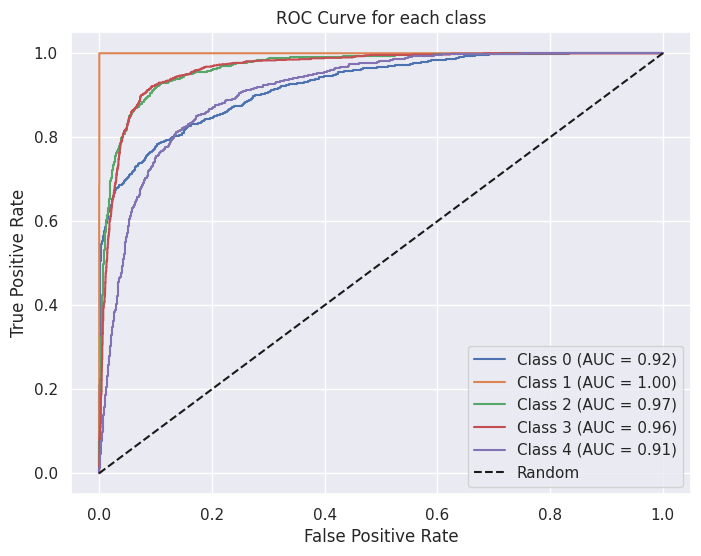

In [ ]:

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_resampled_onehot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc='best')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the model
model = Sequential()
model.add(Dense(1024, input_shape=(X_train_resampled_np.shape[1],), activation='sigmoid', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(512, activation='sigmoid', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_resampled_np, y_train_resampled_onehot,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=2
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_resampled_np, y_test_resampled_onehot)
print(f'Test Accuracy: {test_acc}')

Epoch 1/100
501/501 - 4s - loss: 1.4032 - accuracy: 0.4836 - val_loss: 1.0416 - val_accuracy: 0.5614 - 4s/epoch - 8ms/step
Epoch 2/100
501/501 - 3s - loss: 1.0919 - accuracy: 0.5717 - val_loss: 0.9386 - val_accuracy: 0.6206 - 3s/epoch - 5ms/step
Epoch 3/100
501/501 - 3s - loss: 0.9764 - accuracy: 0.6049 - val_loss: 0.8714 - val_accuracy: 0.6426 - 3s/epoch - 5ms/step
Epoch 4/100
501/501 - 4s - loss: 0.9232 - accuracy: 0.6264 - val_loss: 0.8182 - val_accuracy: 0.6626 - 4s/epoch - 8ms/step
Epoch 5/100
501/501 - 5s - loss: 0.8924 - accuracy: 0.6380 - val_loss: 0.8031 - val_accuracy: 0.6751 - 5s/epoch - 11ms/step
Epoch 6/100
501/501 - 5s - loss: 0.8509 - accuracy: 0.6552 - val_loss: 0.7961 - val_accuracy: 0.6728 - 5s/epoch - 9ms/step
Epoch 7/100
501/501 - 3s - loss: 0.8359 - accuracy: 0.6629 - val_loss: 0.7720 - val_accuracy: 0.6848 - 3s/epoch - 7ms/step
Epoch 8/100
501/501 - 3s - loss: 0.8230 - accuracy: 0.6648 - val_loss: 0.8095 - val_accuracy: 0.6726 - 3s/epoch - 5ms/step
Epoch 9/100
501

In [ ]:
# Get predicted probabilities
y_pred_prob = model.predict(X_test_resampled_np)

# Get predicted classes
y_pred = tf.argmax(y_pred_prob, axis=1).numpy()

print("Classification Report:\n", classification_report(y_test_resampled_np, y_pred))

157/157 [==============================] - 0s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78      1026
           1       0.99      1.00      1.00       966
           2       0.87      0.92      0.89       989
           3       0.87      0.89      0.88      1000
           4       0.76      0.73      0.74      1023

    accuracy                           0.86      5004
   macro avg       0.86      0.86      0.86      5004
weighted avg       0.86      0.86      0.86      5004



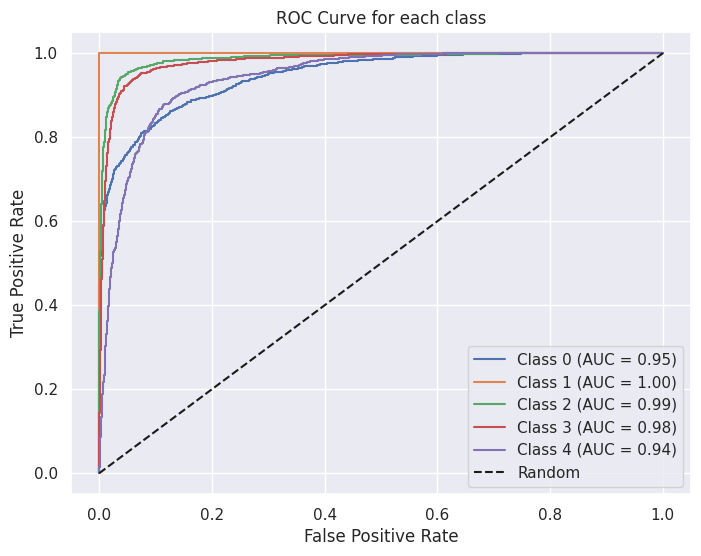

In [ ]:

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_resampled_onehot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc='best')
plt.show()